# **CUSTOMER CHURN PREDICTION**

## **Business Objective**

 An E-Commerce company is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.


## **Data Dictionary**

| Variable                  | Description |
|---------------------------|-------------|
| **AccountID**             | Account unique identifier |
| **Churn**                 | Account churn flag (Target) |
| **Tenure**                | Tenure of account |
| **City_Tier**             | Tier of primary customer's city |
| **CC_Contacted_L12m**     | How many times all the customers of the account have contacted customer care in the last 12 months |
| **Payment**               | Preferred payment mode of the customers in the account |
| **Gender**                | Gender of the primary customer of the account |
| **Service_Score**         | Satisfaction score given by customers of the account on service provided by the company |
| **Account_user_count**    | Number of customers tagged with this account |
| **account_segment**       | Account segmentation on the basis of spend |
| **CC_Agent_Score**        | Satisfaction score given by customers of the account on customer care service provided by the company |
| **Marital_Status**        | Marital status of the primary customer of the account |
| **rev_per_month**         | Monthly average revenue generated by the account in the last 12 months |
| **Complain_l12m**         | Any complaints raised by the account in the last 12 months |
| **rev_growth_yoy**        | Revenue growth percentage of the account (last 12 months vs last 24 to 13 months) |
| **coupon_used_l12m**      | How many times customers have used coupons to make payments in the last 12 months |
| **Day_Since_CC_connect**  | Number of days since no customers in the account have contacted customer care |
| **cashback_l12m**         | Monthly average cashback generated by the account in the last 12 months |
| **Login_device**          | Preferred login device of the customers in the account |


## **Loading Datasets**

**Importing necessary Libraries**

In [7]:
# @title
import os

#For numerical operations
import numpy as np
import pandas as pd

#For data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#For Feature Engineering
import scipy
from scipy.stats import pointbiserialr, chi2_contingency

#For Data Preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score

import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

#setting up the enivornment
pd.set_option('display.max_columns',None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# # Adding the freeze versions to requirements.txt file

# requirements =[]
# requirements.append('numpy=='+np.__version__)
# requirements.append('pandas=='+pd.__version__)
# requirements.append('seaborn=='+sns.__version__)
# requirements.append('matplotlib=='+matplotlib.__version__)
# requirements.append('scipy=='+scipy.__version__)  
# requirements.append('scikit-learn=='+sklearn.__version__)
# requirements.append('yellowbrick=='+yellowbrick.__version__)

# parent_dir = os.path.dirname(os.getcwd())
# os.chdir(parent_dir)

# with open('requirements.txt', 'w') as file:
#     for lib in requirements:
#         file.write(lib+'\n')

In [9]:
# #Create requirements.txt
# !pip freeze > requirements.txt

In [10]:
# Checking versions for all the libraries
parent_dir = os.path.dirname(os.getcwd())

print('Required Libraries Versions:')
requirements_file = os.path.join(parent_dir,'requirements.txt')
with open(requirements_file,'r') as file:
    print(file.read())

print('Installed Library Versions:')
print('numpy=='+np.__version__)
print('pandas=='+pd.__version__)
print('seaborn=='+sns.__version__)
print('matplotlib=='+matplotlib.__version__)
print('scipy=='+scipy.__version__)
print('scikit-learn=='+sklearn.__version__)
print('yellowbrick=='+yellowbrick.__version__)


Required Libraries Versions:
numpy==1.26.4
pandas==2.2.2
seaborn==0.13.2
matplotlib==3.9.2
scipy==1.13.1
scikit-learn==1.5.1
yellowbrick==1.5

Installed Library Versions:
numpy==1.26.4
pandas==2.2.3
seaborn==0.13.2
matplotlib==3.10.0
scipy==1.13.1
scikit-learn==1.6.1
yellowbrick==1.5


**Loading the Dataset**

In [12]:
# #To Read from Google Drive

# #mounting the Google drive
# import google.colab
# google.colab.drive.mount('/content/drive')

# #Reading the data from input
# data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer-Churn-Prediction/docs/Customer Churn Data.xlsx",sheet_name='Data for DSBA')
# print('Loaded the data from :Customer Churn Data.xlsx file')

In [13]:
#To load data set from folder:
input_file = os.path.join(parent_dir,'data','raw','Customer Churn Data.xlsx')
data = pd.read_excel(input_file,sheet_name='Data for DSBA')
print('Loaded the data from :Customer Churn Data.xlsx file')


Loaded the data from :Customer Churn Data.xlsx file


## **Data Overview**

In [15]:
# @title
# User Defined Functions

#1 Function to get data overview :

def data_overview(df):
  print('\n'+'*'*50+'\nData - Structure\n')
  print(f'Shape \t\t:{df.shape} \nSize \t\t:{df.size}\nDimension \t:{df.ndim}')
  print('\n')
  print('*'*50+'\nData - Info\n')
  print(df.info())
  print('\n')
  print(f'Numerical Columns : {len(df.select_dtypes(exclude=["object","category"]).columns)} \n{df.select_dtypes(exclude=["object","category"]).columns.to_list()}\n')
  print(f'Categorical Columns : {len(df.select_dtypes(include=["object","category"]).columns)} \n{df.select_dtypes(include=["object","category"]).columns.to_list()}')
  print('\n')
  print('*'*50+'\nData - Sample\n')
  return df.head(-5)


#2 Function to get check statistical summary of the Dataset :

def check_statistics(df):
  print('*'*50+'\nData - Statistical Summary')
  res1 = df.describe(exclude='object').T
  res2 = df.describe(include='object').T
  return pd.concat([res1,res2])

#3  Function to Check the Unique Values in each columns
def check_unique_values(df):
  for col in df.columns:
    print('*'*50)
    print(df[col].value_counts())

    print(f'\nColumn Name: {col}')  # Print the column name
    print(f'Data Type: {df[col].dtype}')  # Print the column's data type
    print(f'Total Count: {len(df[col])}')
    print(f'Unique Count: {len(df[col].unique())}')
    print(' '*50)

#4 Function to Check the missing Values in each columns
def check_missing_values(df):
  df=df.copy()
  missing_values = df.isna().sum().sort_values(ascending=False)
  total_values = df.shape[0]
  percentage_missing_value = np.round((missing_values/total_values*100),2)
  df_missing_values = pd.DataFrame({'Missing_Values':missing_values,'%_Missing_Values':percentage_missing_value})
  return df_missing_values

#5 Funciton to perform Univariate analysis of each column in a dataset.
def univariate_analysis(df,y):
  for column in df.columns:
    if (df[column].dtype=='object') | (df[column].dtype=='category') | (str(column)==y):
      # for categorical columns
      labeled_barplot(df,column)
      plt.tight_layout()
      plt.show()

    else:
      # for Numerical columns
      histogram_boxplot(df,column,figsize=(10,6))
      plt.tight_layout()
      plt.show()
    print(f"Statistical Summary:")
    print("-" * 20)
    print(df[column].describe())
    print("\n")
    print(f"Missing values: {df[column].isnull().sum()}")
    print(f"Unique values: {df[column].nunique()}")
    print("\n")

  print("\n\n")

#6 function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(10, 6), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    f2.suptitle(f"Distribution of {feature}", fontweight='bold')
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, palette="Paired"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Paired"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is True)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    # Set figure size based on the number of unique categories
    if n is None:
        fig, ax = plt.subplots(figsize=(count + 1, 5))
    else:
        fig, ax = plt.subplots(figsize=(n + 1, 5))

    # Rotate x-axis labels and set font size
    plt.xticks(rotation=90, fontsize=15)

    # Create the count plot
    sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        ax=ax,
    )

    # Add a title
    plt.title(f"Count Plot of {feature}", fontweight='bold')

    # Annotate the bars with percentages or counts
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage
        else:
            label = p.get_height()  # count

        x = p.get_x() + p.get_width() / 2  # x position of the annotation
        y = p.get_height()  # y position of the annotation

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Show the plot
    plt.show()

    # Explicitly close the figure to avoid extra output
    plt.close(fig)

In [16]:
# @title
data_overview(data)


**************************************************
Data - Structure

Shape 		:(11260, 19) 
Size 		:213940
Dimension 	:2


**************************************************
Data - Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 1

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11250,31250,0,3,1.0,40.0,Credit Card,Female,4.0,5,Regular Plus,5.0,Single,5,0.0,17,1,5,164.85,Mobile
11251,31251,1,14,3.0,37.0,E wallet,Male,3.0,5,HNI,5.0,Married,9,1.0,14,3,NaN,240.54,Mobile
11252,31252,0,13,3.0,33.0,E wallet,Female,3.0,NaN,Super Plus,1.0,Married,4,0.0,12,4,7,252.31,Mobile
11253,31253,0,5,1.0,17.0,Credit Card,Male,4.0,4,Super,5.0,Single,3,0.0,20,2,8,227.36,Computer


**Observations:**

- The dataset has a total of **11,260 observations** and **19 features**.
- Of these 19 features:
  - **7** are numerical datatypes.
  - **12** are object types.
  - However, this can be reconsidered lated based on the nature and distribution of the data

- The **`AccountID`** column can be considered as the unique identifier in the dataset.

- From the data sample, it is observed that there are **missing values** in the dataset.

In [18]:


print("Statistical Summary of Numerical Colummns")
data.select_dtypes(exclude=["object","category"]).describe().T

Statistical Summary of Numerical Colummns


,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [19]:
print("Statistical Summary of Categorical Colummns")
data.select_dtypes(include=["object","category"]).describe().T

Statistical Summary of Categorical Colummns


,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


**Observations:**

  - `Churn` :
    - There are no missing values.
    - The mean churn rate is 16.84% (mean = 0.168384), indicating that approximately 16.84% of customers have churned.
  - ` City_Tier`:
    - The mean city tier is 1.65, with a standard deviation of 0.915.
    - The values range from 1 to 3, indicating three tiers of cities. The 50% of the data is from city tier 1
  - `CC_Contacted_LY`:
    - Customers contacted the call center 17.87 times on an average last year, with a standard deviation of 8.85.
    - The range is from 4 to 132 contacts with 75% of the data lies in 23 indicating the data is strongly right skewed
    - Also there are high chances of outliers as well.
  - `Service_Score`:
    - The average service score is 2.90 (which is not so good), with a standard deviation of 0.73. Scores range from 0 to 5.
  - ` CC_Agent_Score`:
    - The average call center agent score is 3.07, with a standard deviation of 1.38. Scores range from 1 to 5.
  - ` Complain_ly`
    - About 28.53% of customers complained last year.
  - `Tenure` :
    - The Tenure column has 38 unique values, with the most frequent value being 1 (appearing 1,351 times).
  - `Payment`:
    - There are 5 unique payment methods.
    - The most frequent payment method is Debit Card.
  - `Gender`:
    - There are 4 unique gender categories.( However, this could be also due to some typing mistake as well)
    - The most frequent gender is Male.
  - `Account_user_count`:
    - The user count within an account has 7 unique values, with the most frequent value being 4 (appearing 4569 times).
  - `account_segment`:
    - The most common account segment is "Super," with 4,062 occurrences.
  - ` Marital_Status`:
    - There are 3 unique marital statuses. The majority of customers are Married, with 5,860 occurrences.
  - `rev_per_month`:
   - The most frequent monthly revenue value is 3, appearing 1,746 times. However, this might need to convert to numerical feature.
  - `rev_growth_yoy`:
   - The most frequent year-over-year revenue growth value is 14, appearing 1,524 times. This again might need to convert to numerical feature after further analysis.
  - ` coupon_used_for_payment`:
    - The most frequent value is 1, appearing 4,373 times. This suggests a common behavior in using coupons for payments.
  -  `Day_Since_CC_connect`:
   - The most frequent value is 3, appearing 1,816 times. This indicates a common recency of customer service contact.
  - ` cashback`
   - The most frequent cashback value is 155.62, appearing 10 times. This suggests a specific cashback amount is popular. However, this also might need to be converted to numerical type after detailed analysis
  - `Login_device`:
    - There are 3 unique login devices.
    - The majority of logins are from Mobile devices, with 7,482 occurrences. This indicates a strong preference for mobile access.


**Overall:**

- The dataset is imbalanced, with 16.84% churn rate.

- Several columns have missing values and outliers, which need to be handled

- Categorical features like Payment, Gender, account_segment, and Marital_Status should be encoded

- Features like CC_Contacted_LY, Service_Score, CC_Agent_Score, and Complain_ly may strongly influence churn prediction.

- Tenure and rev_per_month could also be significant predictors.



## **Data Preprocessing**

In [22]:
# @title
# Taking backup of Raw data
data_raw = data.copy()

In [23]:
# @title
#Saving the raw data
data_raw.to_csv(os.path.join(parent_dir,'data','raw','data_raw.csv'),index=False)
print("Saved the Raw data to : ../data/raw/data_raw.csv")

Saved the Raw data to : ../data/raw/data_raw.csv


### **Checking the Duplicate Values in each columns**


In [25]:
# @title
data.duplicated().sum()

0

In [26]:
# @title
data['AccountID'].duplicated().sum()

0

**Observations:**

- There are no duplicate records found in the data set

### **Checking the Unique Values in each columns**


In [29]:
# @title
check_unique_values(data)

**************************************************
AccountID
20000    1
27510    1
27502    1
27503    1
27504    1
        ..
23754    1
23755    1
23756    1
23757    1
31259    1
Name: count, Length: 11260, dtype: int64

Column Name: AccountID
Data Type: int64
Total Count: 11260
Unique Count: 11260
                                                  
**************************************************
Churn
0    9364
1    1896
Name: count, dtype: int64

Column Name: Churn
Data Type: int64
Total Count: 11260
Unique Count: 2
                                                  
**************************************************
Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114

**Observations:**

- **Invalid Entries to be Updated as `NaN`**

 The following columns contain invalid entries that need to be replaced with `NaN`:

  - **Tenure**: Invalid record (`#`)
  - **Account_user_count**: Invalid record (`@`)
  - **rev_per_month**: Invalid record (`+`)
  - **rev_growth_yoy**: Invalid record (`$`)
  - **coupon_used_for_payment**: Invalid records (`$`, `#`, `*`)
  - **Day_Since_CC_connect**: Invalid record (`$`)
  - **cashback**: Invalid record (`$`)
  - **Login_device**: Invalid record (`&&&&`)

- **Duplicated classes in one Column that to be Combined:**

  The following columns contain duplicated records that can be combined to ensure consistency:
   - **Gender**:
   Combine similar values like "Male" and "M" into a single category (e.g., "Male")..
  
   - **account_segment**:
  Combine similar values like "Super Plus" and "Super +" into a single category (e.g., "Super Plus").

   - **Account_user_count**: As per current Indian e-commerce regulations, there is no explicit limit on the number of users that can be tagged with an account on an e-commerce platform
   
   Based on the Business, different types of accounts (e.g., individual, family, business) might have different limits on the number of users. For example, a family account might allow up to 5 users, while a business account might allow 50 or more.
  
   So we will be considering Account_user_count as Continuous Numerical variable even though it is Discrete numerical in nature.
   
   We can create a new Feature based on the levels in this column later during Feature Engineering

Based on the unique values in each columns , the columns can be grouped into 3:
  - **Conitnuous Numerical Columns :**Tenure, CC_Contacted_LY, Account_user_count, rev_per_month, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback

  - **Discrete Numerical :** Churn, City_Tier, Service_Score, CC_Agent_Score, Complain_ly,
  - **Categorical :** Payment, Gender, account_segment, Marital_Status, Login_device

### **Handling Columns with Incorrect/Invalid Entries**

In [32]:
# @title
data_correct_entries = data.copy()
df_cols_with_invalid_entries = ['Tenure', 'Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
for col in df_cols_with_invalid_entries:
  data_correct_entries[col] =pd.to_numeric(data_correct_entries[col],errors='coerce')
  data_correct_entries[col] = data_correct_entries[col].replace('#',np.nan)
  data_correct_entries[col] = data_correct_entries[col].replace('@',np.nan)
  data_correct_entries[col] = data_correct_entries[col].replace('+',np.nan)
  data_correct_entries[col] = data_correct_entries[col].replace('$',np.nan)
  data_correct_entries[col] = data_correct_entries[col].replace('*',np.nan)
print('Converted all the columns to Numeric and corrected the invalid entries')

Converted all the columns to Numeric and corrected the invalid entries


### **Handling Columns that require refining the unique values**

In [34]:
# @title
# Duplicated Records to be Combined
data_correct_entries['Gender']=data_correct_entries['Gender'].astype('category').apply(lambda x:x.replace('Male','M'))
data_correct_entries['Gender']=data_correct_entries['Gender'].astype('category').apply(lambda x:x.replace('Female','F'))
data_correct_entries['Gender']=data_correct_entries['Gender'].astype('category').apply(lambda x:x.replace('M','Male'))
data_correct_entries['Gender']=data_correct_entries['Gender'].astype('category').apply(lambda x:x.replace('F','Female'))
data_correct_entries['account_segment']=data_correct_entries['account_segment'].astype('category').apply(lambda x:x.replace('Super +','Super Plus'))
data_correct_entries['account_segment']=data_correct_entries['account_segment'].astype('category').apply(lambda x:x.replace('Regular +','Regular'))

# Classifying the &&&& as Others Category as they does not seem to be treated as Nan
data_correct_entries['Login_device']=data_correct_entries['Login_device'].astype('category').apply(lambda x:x.replace('&&&&','Others'))
print('Updated the columns that require refining the unique values')

#Renaming the levels in Payment Column
data_correct_entries['Payment']=data_correct_entries['Payment'].astype('category').apply(lambda x:x.replace('Cash on Delivery','COD'))
data_correct_entries["Payment"] = data_correct_entries["Payment"].replace({
    "Credit Card":"CC",
    "Cash on Delivery":"COD",
    "E wallet": "Wallet",
    "Debit Card": "DC"
})


Updated the columns that require refining the unique values


### **Converting Discrete Numerical Columns to Categorical**

In [36]:
# Converting Discrete Numerical columns to Categorical
data_correct_entries['City_Tier'] = data_correct_entries['City_Tier'].astype('category')
data_correct_entries['Service_Score'] = data_correct_entries['Service_Score'].astype('category')
data_correct_entries['CC_Agent_Score'] = data_correct_entries['CC_Agent_Score'].astype('category')
data_correct_entries['Complain_ly'] = data_correct_entries['Complain_ly'].astype('category')

# Converting Categorical Columns that were Numeric as Categorical
data_correct_entries['Payment'] = data_correct_entries['Payment'].astype('category')
data_correct_entries['account_segment'] = data_correct_entries['account_segment'].astype('category')
data_correct_entries['Marital_Status'] = data_correct_entries['Marital_Status'].astype('category')
data_correct_entries['Churn'] = data_correct_entries['Churn'].astype('category')

print('Converted certain columns to Categorical')

Converted certain columns to Categorical


### **Removing the columns that are not necessary**

As the AccountID is just a unique identifier of the account, it does not add any significance in identifying patterns. So we can remove the AccountID from the data set.

In [39]:
# @title
data_correct_entries.drop(['AccountID'],axis=1, inplace=True)


In [40]:
# @title
# Storing Categorical columns and Numerical columns to separate list
cat_columns = data_correct_entries.select_dtypes(include='category').columns.to_list()
print(f'Categorical Columns : {cat_columns}')

num_columns = data_correct_entries.select_dtypes(exclude='category').columns.to_list()
print(f'Numerical Columns : {num_columns}')


Categorical Columns : ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
Numerical Columns : ['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [41]:
# @title
data_overview(data_correct_entries)


**************************************************
Data - Structure

Shape 		:(11260, 18) 
Size 		:202680
Dimension 	:2


**************************************************
Data - Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  category
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  category
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  category
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  category
 10  Marital_Status           11048 non-null

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,DC,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,DC,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,DC,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,CC,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11250,0,3.0,1.0,40.0,CC,Female,4.0,5.0,Regular Plus,5.0,Single,5.0,0.0,17.0,1.0,5.0,164.85,Mobile
11251,1,14.0,3.0,37.0,Wallet,Male,3.0,5.0,HNI,5.0,Married,9.0,1.0,14.0,3.0,NaN,240.54,Mobile
11252,0,13.0,3.0,33.0,Wallet,Female,3.0,NaN,Super Plus,1.0,Married,4.0,0.0,12.0,4.0,7.0,252.31,Mobile
11253,0,5.0,1.0,17.0,CC,Male,4.0,4.0,Super,5.0,Single,3.0,0.0,20.0,2.0,8.0,227.36,Computer


##**Exploratory Data Analysis**

### **Univariate Analysis**

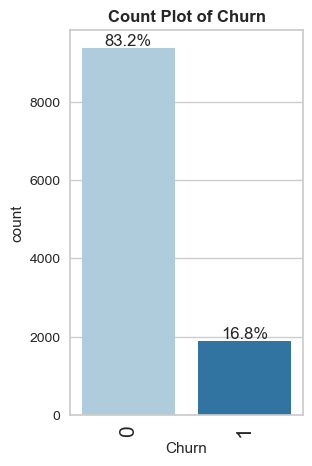

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11260
unique        2
top           0
freq       9364
Name: Churn, dtype: int64


Missing values: 0
Unique values: 2




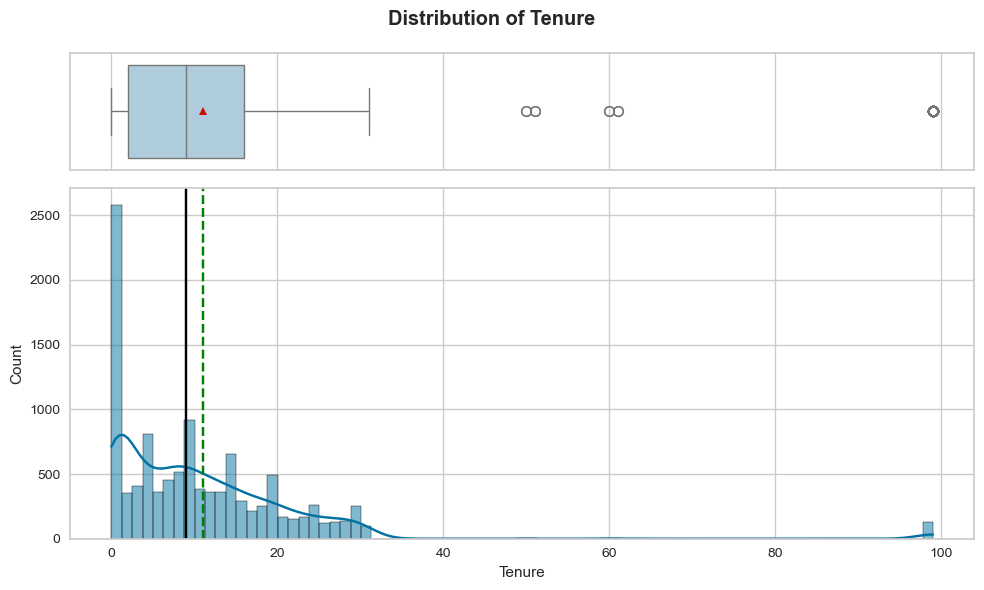

Statistical Summary:
--------------------
count    11042.000000
mean        11.025086
std         12.879782
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64


Missing values: 218
Unique values: 37




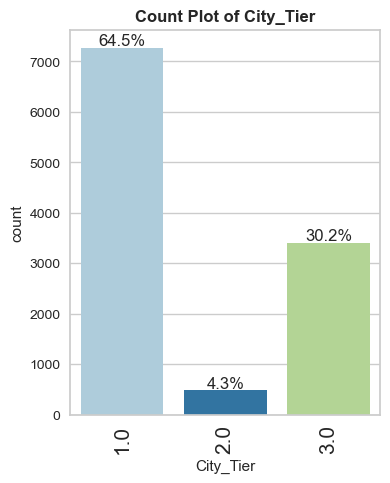

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11148.0
unique        3.0
top           1.0
freq       7263.0
Name: City_Tier, dtype: float64


Missing values: 112
Unique values: 3




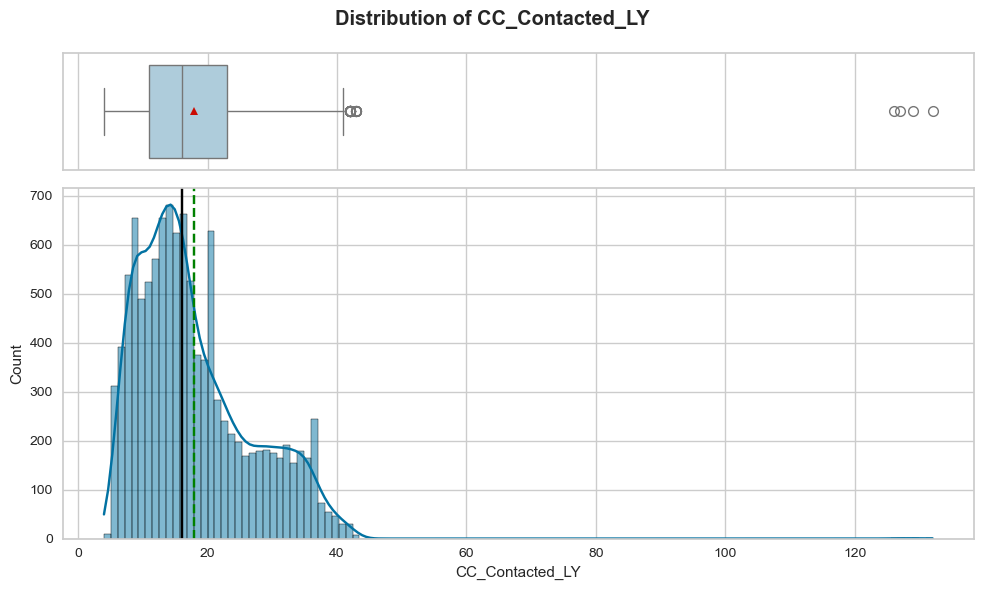

Statistical Summary:
--------------------
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64


Missing values: 102
Unique values: 44




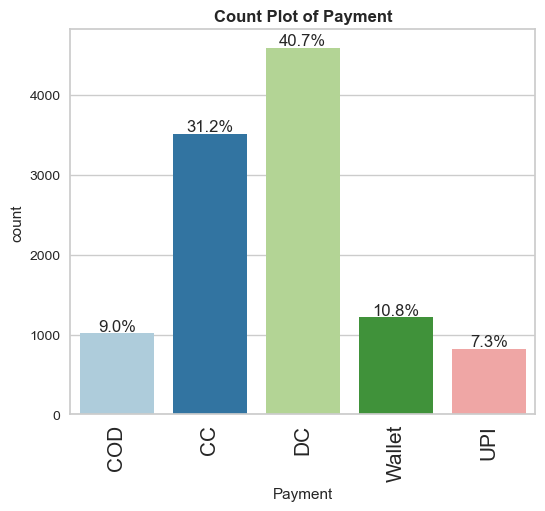

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11151
unique        5
top          DC
freq       4587
Name: Payment, dtype: object


Missing values: 109
Unique values: 5




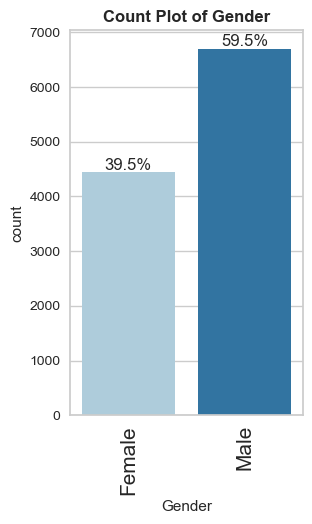

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11152
unique        2
top        Male
freq       6704
Name: Gender, dtype: object


Missing values: 108
Unique values: 2




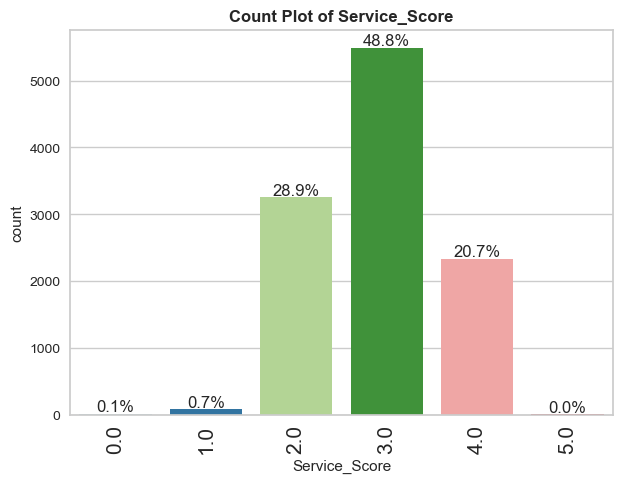

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11162.0
unique        6.0
top           3.0
freq       5490.0
Name: Service_Score, dtype: float64


Missing values: 98
Unique values: 6




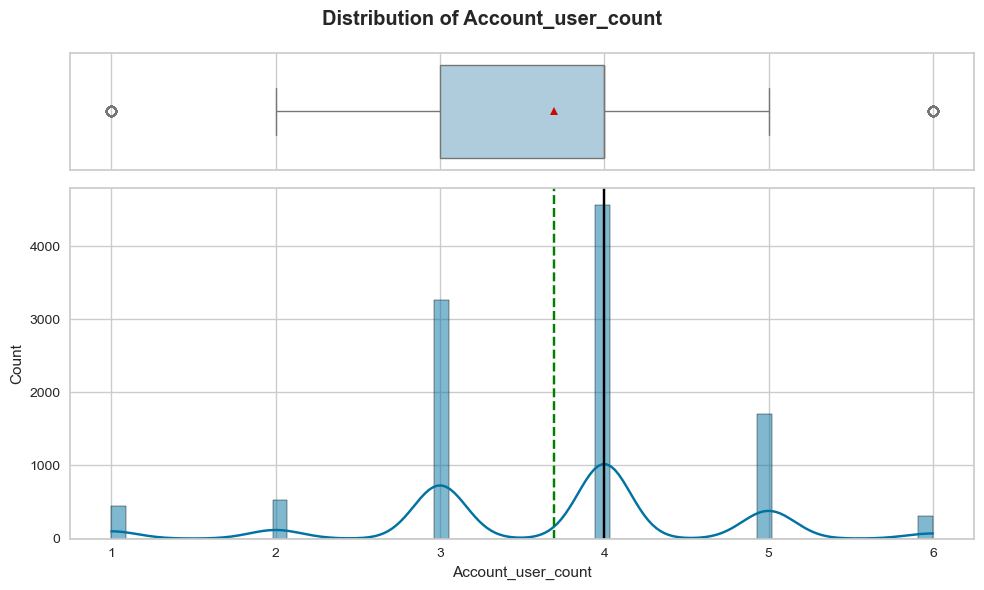

Statistical Summary:
--------------------
count    10816.000000
mean         3.692862
std          1.022976
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64


Missing values: 444
Unique values: 6




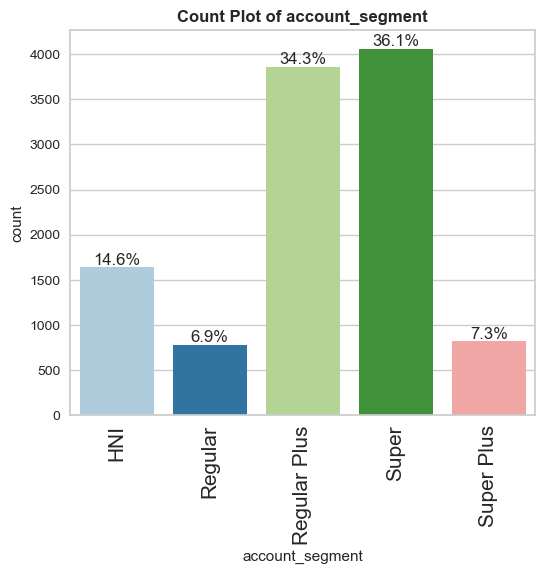

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11163
unique        5
top       Super
freq       4062
Name: account_segment, dtype: object


Missing values: 97
Unique values: 5




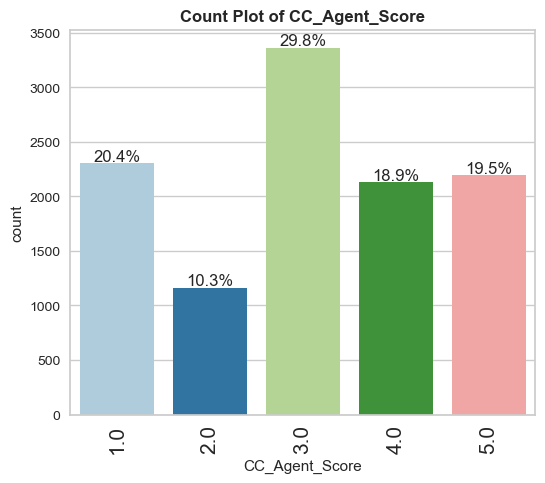

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     11144.0
unique        5.0
top           3.0
freq       3360.0
Name: CC_Agent_Score, dtype: float64


Missing values: 116
Unique values: 5




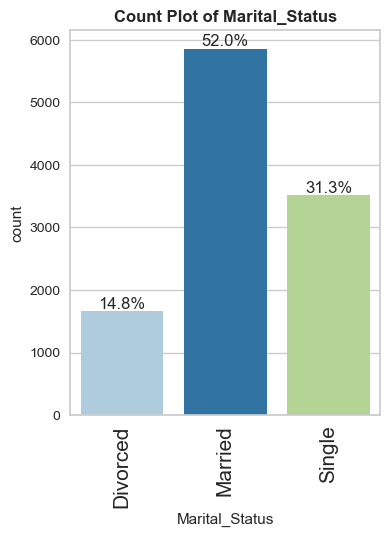

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count       11048
unique          3
top       Married
freq         5860
Name: Marital_Status, dtype: object


Missing values: 212
Unique values: 3




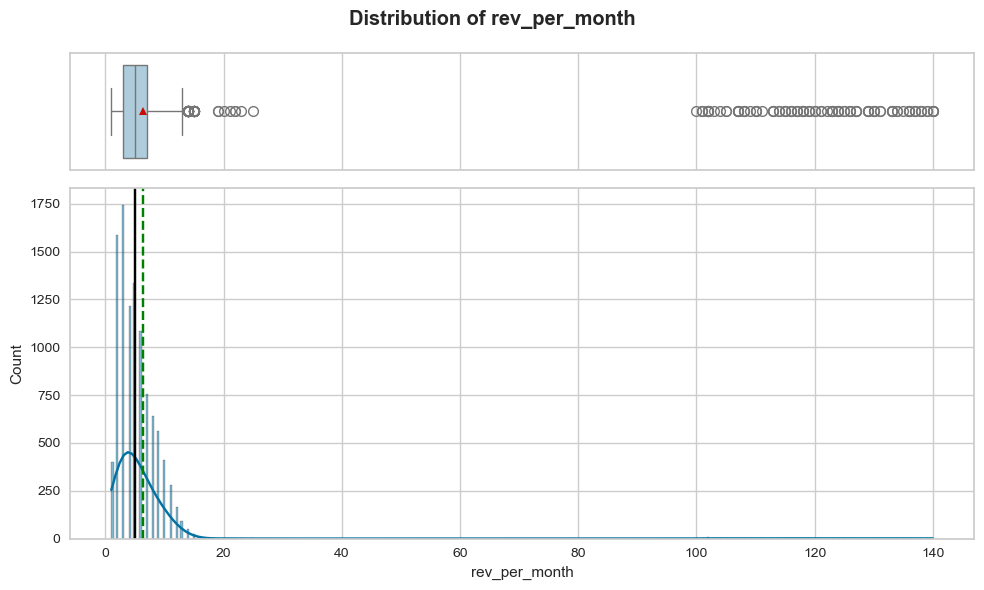

Statistical Summary:
--------------------
count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64


Missing values: 791
Unique values: 58




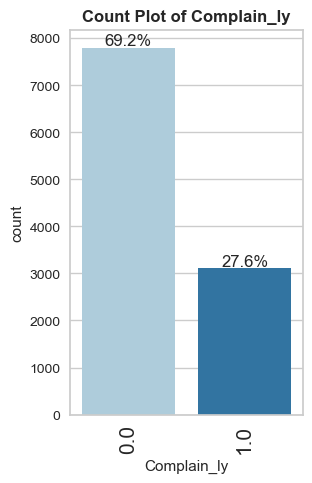

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count     10903.0
unique        2.0
top           0.0
freq       7792.0
Name: Complain_ly, dtype: float64


Missing values: 357
Unique values: 2




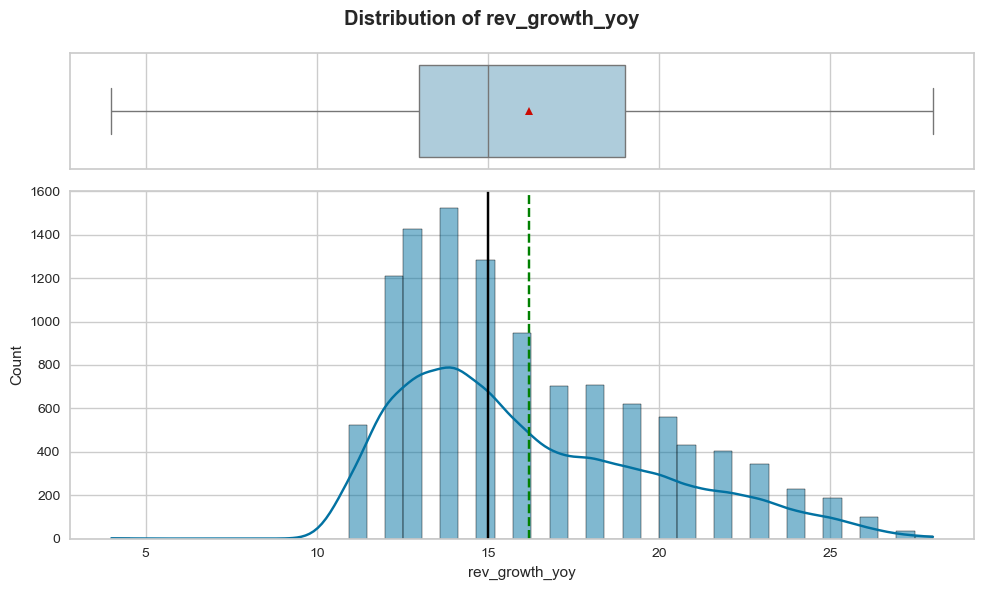

Statistical Summary:
--------------------
count    11257.000000
mean        16.193391
std          3.757721
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64


Missing values: 3
Unique values: 19




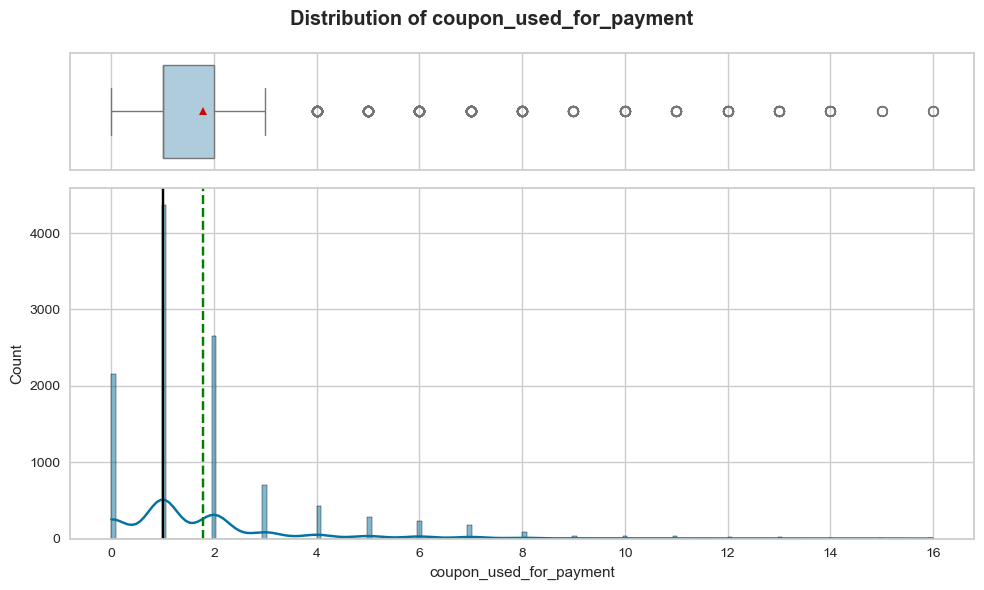

Statistical Summary:
--------------------
count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64


Missing values: 3
Unique values: 17




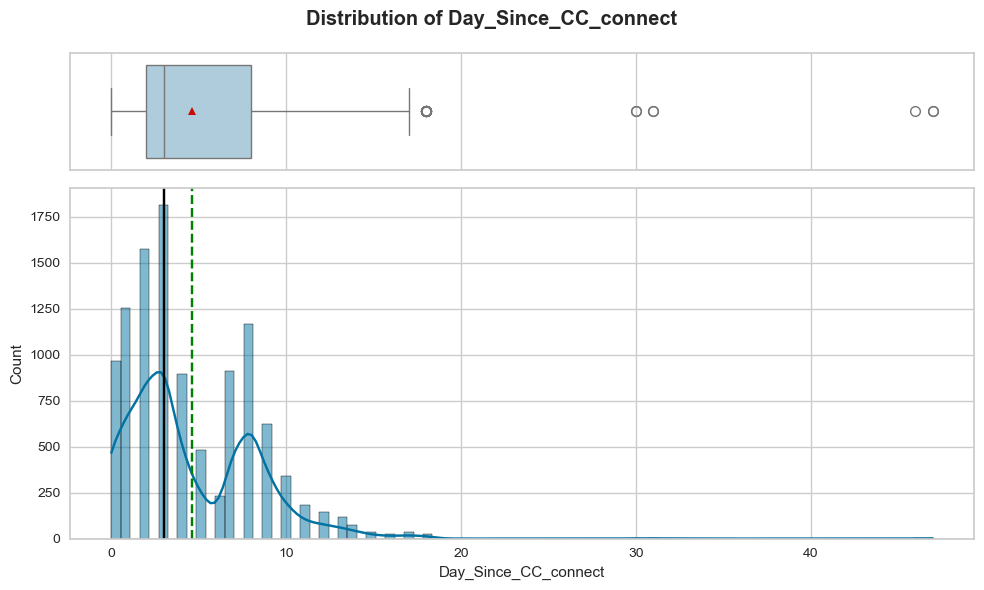

Statistical Summary:
--------------------
count    10902.000000
mean         4.633187
std          3.697637
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64


Missing values: 358
Unique values: 23




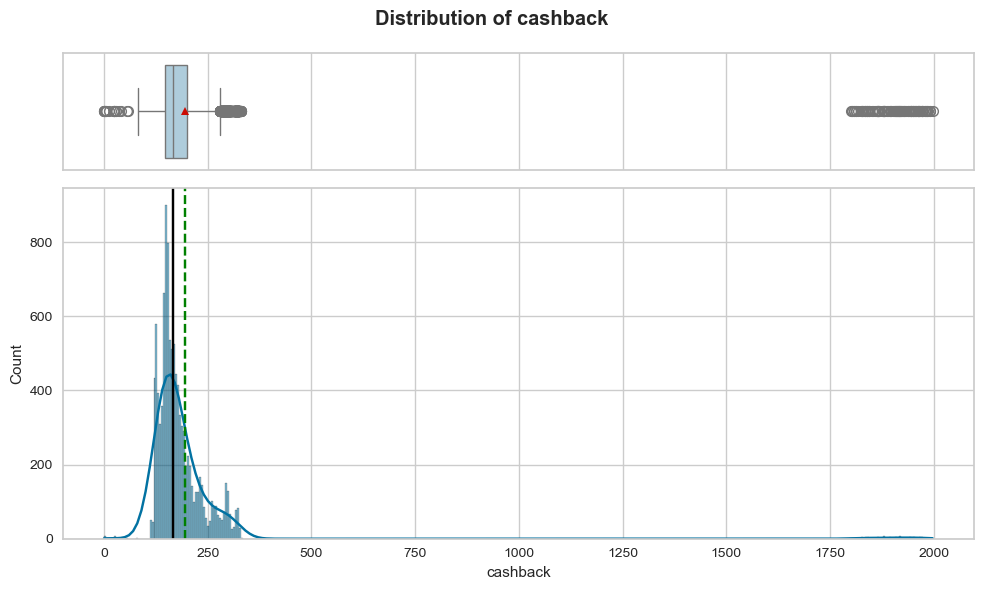

Statistical Summary:
--------------------
count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64


Missing values: 473
Unique values: 5692




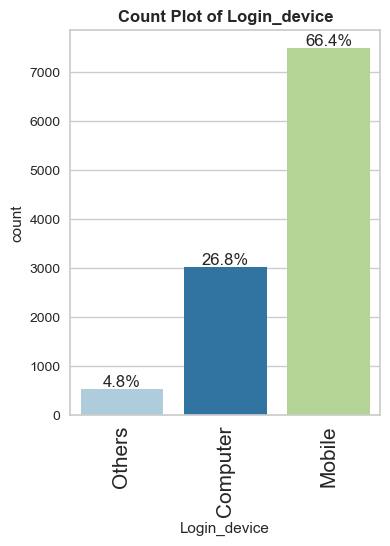

<Figure size 800x550 with 0 Axes>

Statistical Summary:
--------------------
count      11039
unique         3
top       Mobile
freq        7482
Name: Login_device, dtype: object


Missing values: 221
Unique values: 3







In [44]:
# @title
univariate_analysis(data_correct_entries,'Churn')

**Observations:**

- **churn:**
  - This will be considered as the target variable
  - The dataset is imbalanced, with a much higher proportion of non-churned customers (83.2%) compared to churned customers (16.8%).
  - The Churn column is binary, with 0 (no churn) and 1 (churn).
  - The Churn column is complete, with no missing values
  - We need to consider oversampling techniques to address the class imbalance.
- **Tenure:**
  - The distribution of tenure is right-skewed, with most customers having lower tenure values (0–20 months) and fewer customers having higher tenure values (up to 99 months).
  - The peak at lower tenure values suggests that many customers are relatively new.
  - There are 218 missing values in the Tenure column, which need to be handled
  - The maximum tenure value (99 months) is significantly higher than the 75th percentile (16 months), suggesting potential outliers or long-term customers.
- **City_Tier**
  - The dataset is heavily skewed toward City Tier 1, which accounts for 64.5% of customers.
  - City Tier 3 has the smallest representation (4.3%), indicating that very few customers reside in Tier 3 cities.
  - There are 112 missing values in the City_Tier column, which need to be handled
- **CC_Contacted_LY:**
  - The distribution is right-skewed, with most customers being contacted between 10 and 20 times and a long tail extending up to 132 contacts.
  - The maximum value (132) is significantly higher than the 75th percentile (23), suggesting potential outliers or customers who were contacted excessively.
  - There are 102 missing values in the  column, which need to be handled
- **Payment:**
  - The dataset is heavily skewed toward Credit Card (CC), which accounts for 31.2% of customers.
  - Debit Card (DC) and Wallet are less frequently used, with 9.0% and 10.8% respectively.
  - A small percentage (7.3%) of customers use UPI methods.
  - There are 109 missing values in the Payment column, which need to be handled
- **Gender:**
  - Gender distribution is heavily skewed toward Male customers, with fewer Female customers.
  - There are 109 missing values that need to be addressed
- **Service_Score:**
  - The majority of customers (48.8%) gave a service score of 3.0.
  - There are 98 missing values in the Service_Score column, which need to be handled
  - Very few customers gave scores of 1.0 and 0.0.
- **Account_user_count:**
  - The dataset is heavily skewed toward 4.0, which accounts for 40.6% of accounts.
  - 3.0 and 2.0 are less frequent, with 29.0% and 15.1% respectively.
  - Very few accounts have 1.0 user (2.8%).
  - There are 444 missing values in the column, which need to be handled
  - There are no significant outliers, as the data is tightly clustered around the median.
- **Account_segment:**
  - Majority of customers belong to the Super account segment.
  - Regular Plus is the second most frequent account segment.
  - HNI, Super Plus, and Regular have significantly lower frequencies.
  - There are 97 missing values that need to be addressed.
- **CC_Agent_Score:**
  - Majority of customers rated the agent as 3.0.
  - Other agent scores (e.g., 1.0, 2.0, 4.0, 5.0) have much lower frequencies.
  - There are 116 missing values that need to be addressed.
- **Marital_Status:**
  - Data is heavily skewed towards Married customers,with fewer Single and least no. of Divorced customers.
  - There are 212 missing values that need to be addressed.
- **rev_per_month:**
 - The rev_per_month column has a right-skewed distribution, with most customers generating low revenue (1–20).
  - There are 791 missing values and outliers (e.g., 140) that need to be addressed.
- **Complain_ly:**
  - The data is heavily skewed with most customers not filing a complaint in the last year.
  - There are 357 missing values that need to be addressed.
- **rev_growth_yoy:**
  - The majority of customers have a revenue growth between 10% and 20%, with a peak around 15%.
  - The average revenue growth year-over-year is approximately 16.19%.
  - There are 3 missing values and a few outliers (e.g., 28%) that need to be addressed.
- **coupon_used_for_payment:**
  - The coupon_used_for_payment column has a right-skewed distribution, with most customers using 1–2 coupons.
  - There are 3 missing values and outliers (e.g., 16 coupons) that need to be addressed.
- **Day_Since_CC_connect:**
  - The Day_Since_CC_connect column has a right-skewed distribution, with most customers connecting recently (within the last 10 days).
  - The average number of days since the last CC connect is approximately 4.63.
  - There are 358 missing values and outliers (e.g., 47 days) that need to be addressed.
- **cashback:**
  - The cashback column has a right-skewed distribution, with majority of customers received cashback amounts between 0 and 500, with a peak around 150–200.
  - The average cashback amount is approximately 196.26.
  - There are 473 missing values and outliers (e.g., 1,997) that need to be addressed.
- **Login_device:**
  - The distribution is heavily skewed toward Mobile login devices, with fewer customers using Computer or Others.
  - There are 221 missing values that need to be addressed.

### **Bivariate Analysis**

#### **Churn Vs Numerical Columns**

In [48]:
# @title
#Plotting Churn Vs Numerical columns :
num_columns = data_correct_entries.select_dtypes(exclude=["object","category"]).columns
print(f'Numerical Columns : \n{num_columns}')


Numerical Columns : 
Index(['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')


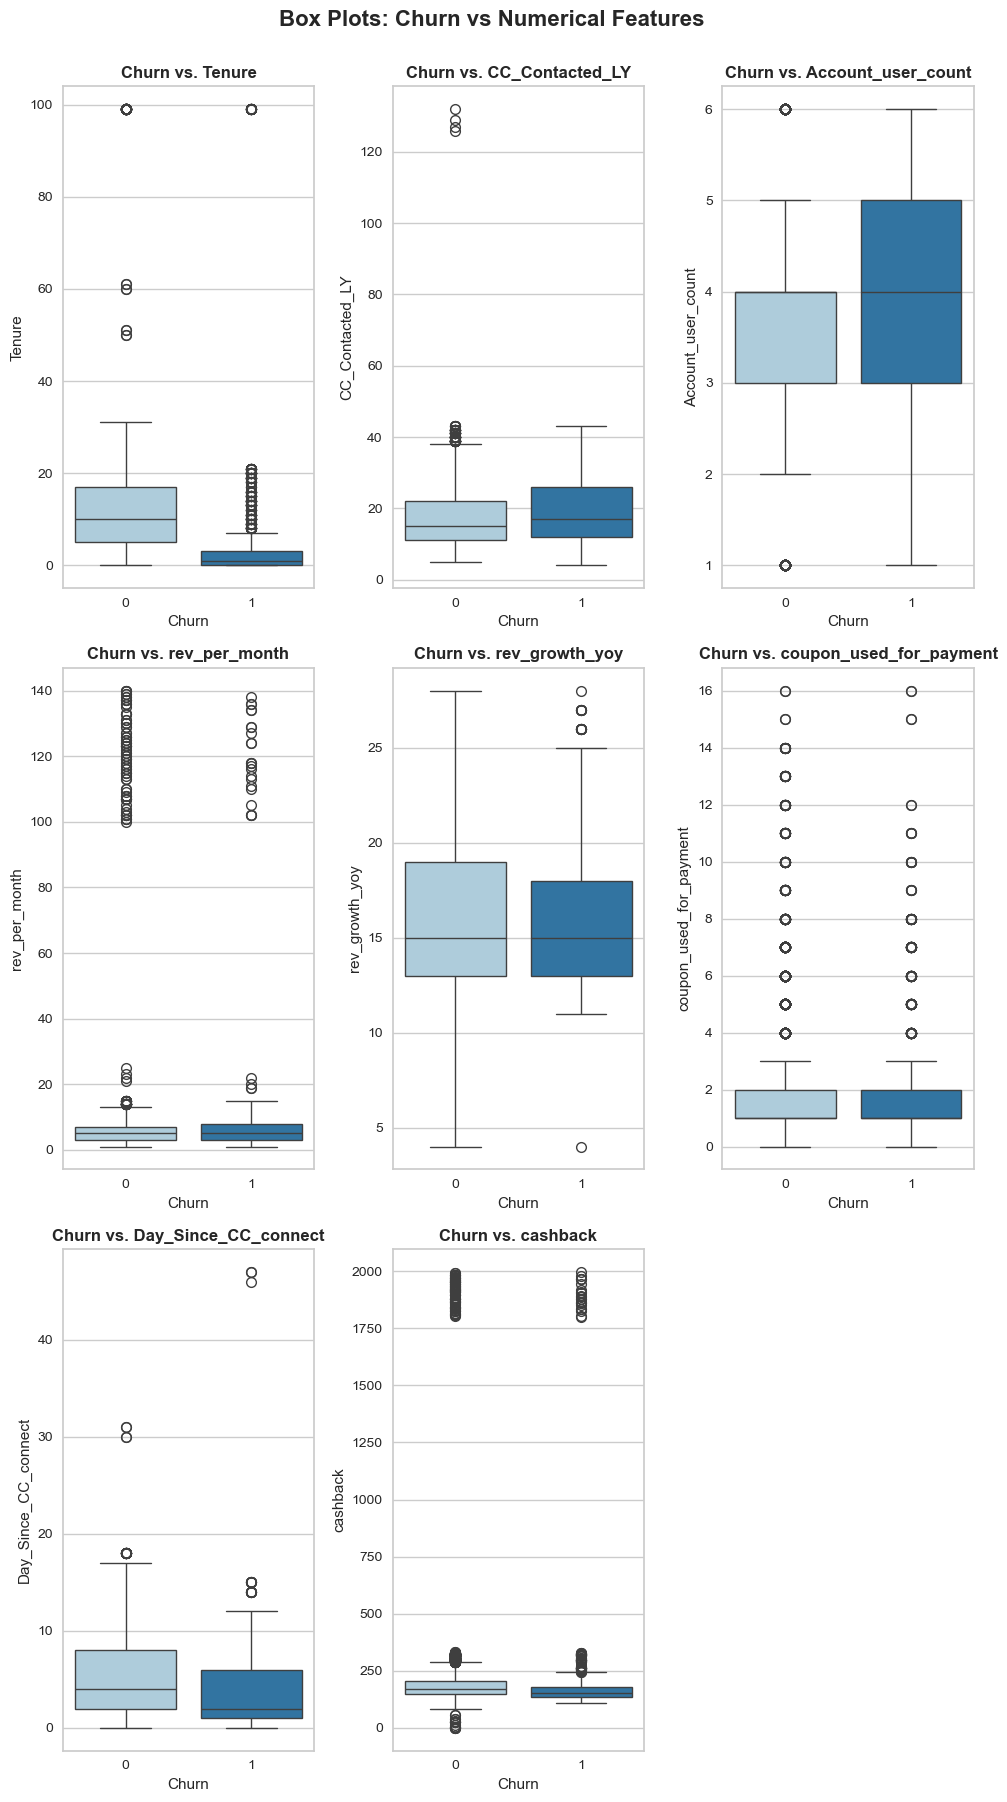

In [49]:
# @title
num_columns = [col for col in num_columns if col != 'Churn']

#plotting box plots for each num columns
fig, axes = plt.subplots((len(num_columns)//3+1),3,figsize=(10, 18))
axes = axes.flatten()
fig.suptitle('Box Plots: Churn vs Numerical Features',fontsize=16, fontweight='bold', y=1)
for i, col in enumerate(num_columns):
    if col=='Churn':
      axes[i].set_visible(False)
    else:
      sns.boxplot(data=data_correct_entries, x='Churn', y=col, ax=axes[i], palette="Paired")
      axes[i].set_title(f'Churn vs. {col}',fontweight='bold')
      axes[i].set_xlabel('Churn')
      axes[i].set_ylabel(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Observations:**

**Tenure vs. Churn**  
- Customers with lower tenure are more likely to churn.  
- Churned customers generally have shorter tenures, indicating that newer customers are at higher risk.  

**CC_Contacted_LY vs. Churn**  
- Churned customers have a higher median number of customer care contacts.  
- Some extreme outliers suggest that customers who contact customer support excessively might be at risk of churn.  

**Account_user_count vs. Churn**  
- No strong trend, but higher user counts seem to have a wider spread for churned customers.  
- Most Customers Have 3 or 4 Users on Their Account
- Lower Churn in Accounts with 1, 2, 5, or More Users
- Accounts with 3-4 users should be targeted for retention strategies, as they exhibit a higher churn rate

**rev_per_month vs. Churn**  
- Churned customers tend to have slightly lower revenue per month.  
- High-revenue customers are less likely to churn, but a few still do.  

**rev_growth_yoy vs. Churn**  
- Similar distributions for both churned and retained customers.  
- Might not be a strong predictor of churn on its own.  

**coupon_used_for_payment vs. Churn**  
- Churned customers tend to use slightly fewer coupons on average.  
- Some customers with very high coupon usage also churn, but the difference isn’t stark.  

**Day_Since_Last_CC_Contact vs. Churn**  
- Customers who churn often had recent interactions with customer care.  
- Some extreme cases where churned customers had a long gap in customer care interaction.  

**cashback vs. Churn**  
- Cashback amounts are similar for both churned and non-churned customers.  
- Some high cashback recipients still churn, suggesting cashback alone isn’t a retention guarantee.  

**Key Takeaways for Churn Prediction**  
- Tenure and Customer Care Contacts are strong churn indicators.  
- Low revenue per month and low coupon usage might signal churn risk.  
- Days since last customer care contact could be an important factor in predicting churn.  


#### **Churn Vs Categorical Columns**

In [52]:
# @title
#Plotting Churn Vs Categorical columns :

cat_columns = data_correct_entries.select_dtypes(include='category').columns.to_list()
print(f'Categorical Columns : {cat_columns}')

Categorical Columns : ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']


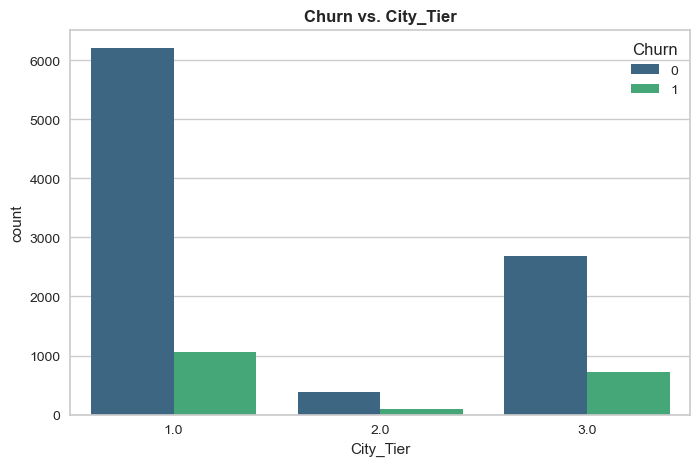

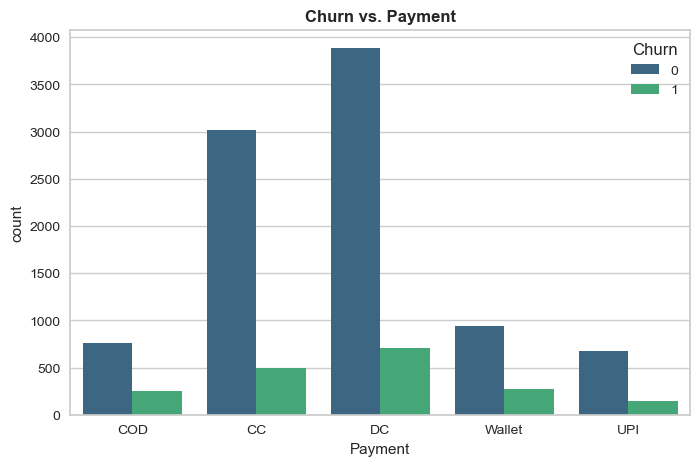

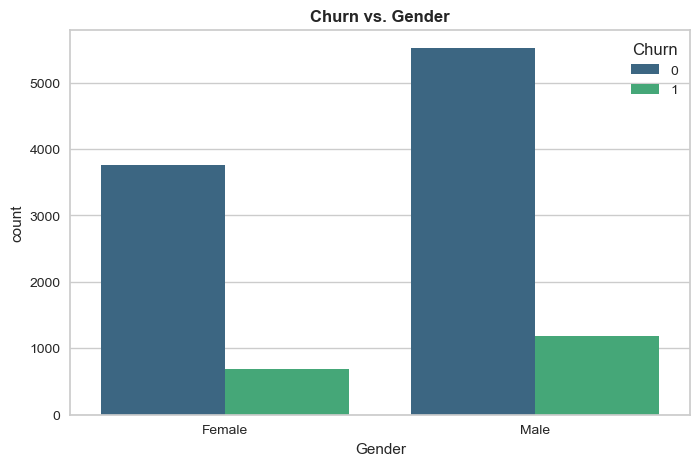

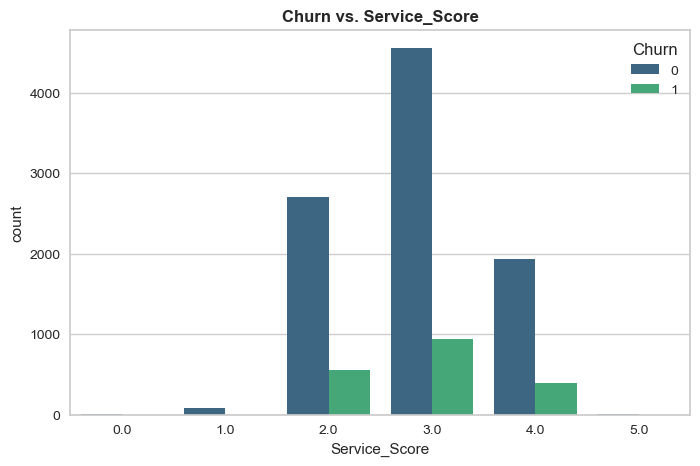

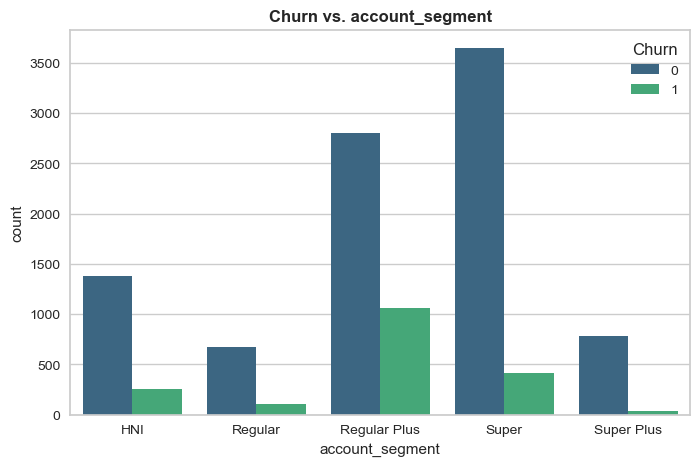

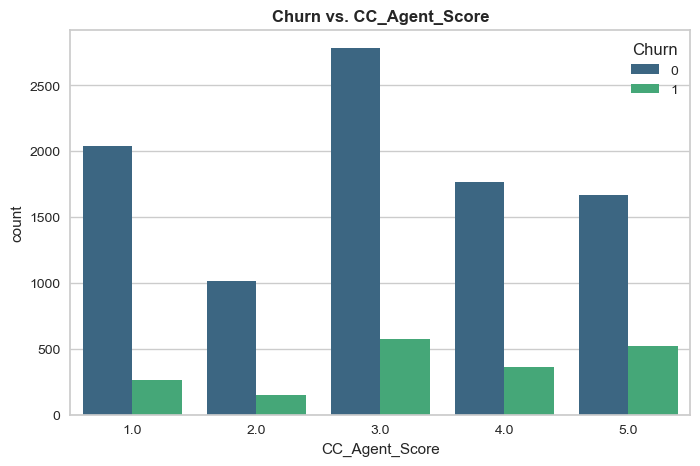

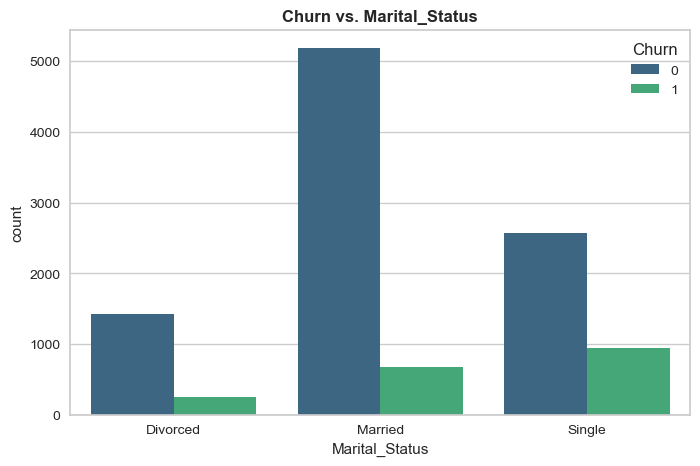

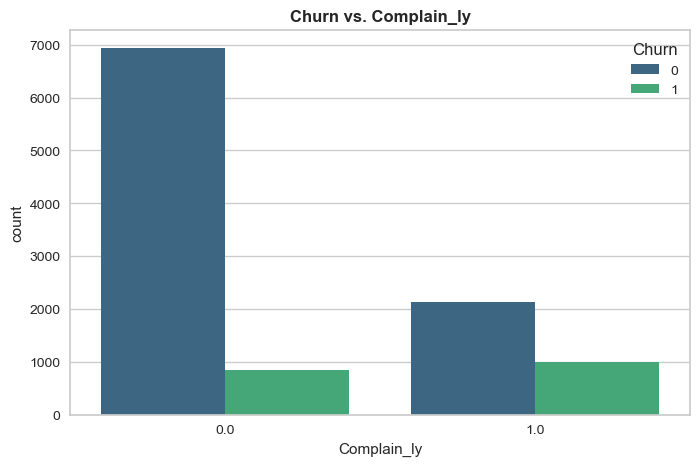

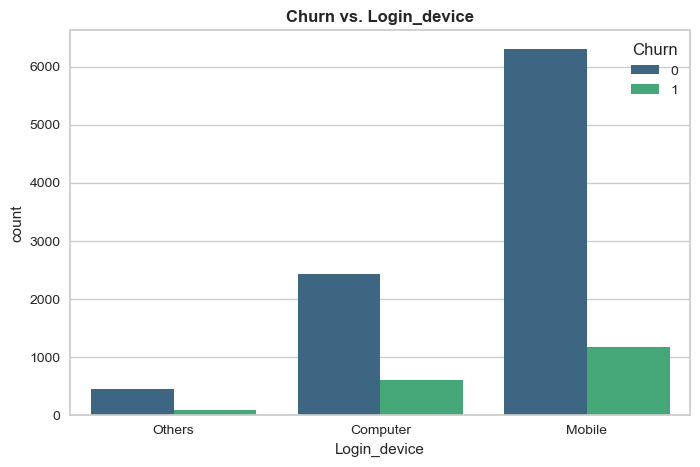

In [53]:
# @title
#plot stacked bar plot for each cat columns
for col in cat_columns:
  if col=='Churn':
    continue
  else:
    plt.figure(figsize=(8,5))
    sns.countplot(data=data_correct_entries, x=col, hue='Churn', palette="viridis")
    plt.title(f'Churn vs. {col}',fontweight='bold')
    plt.show()

**Observations:**

- **Churn vs City_Tier:**

  - **City Tier 1 Has the Highest Customer Base & Churn Rate**  
    - The majority of customers belong to **City Tier 1**, with both churned and non-churned customers having high counts.  
    - However, the **number of churned customers is also highest in Tier 1**, indicating a greater risk of customer loss in this segment.  

  - **City Tier 2 Has the Lowest Customer Base & Churn**  
    - **City Tier 2 has the smallest customer base**, with both low churn and low retention.  
    - This could suggest that fewer customers are engaged from this tier.  

  - **City Tier 3 Shows Moderate Churn & Retention**  
    - **City Tier 3 has a lower customer base than Tier 1 but higher than Tier 2.**  
    - The churn count is **noticeably lower than Tier 1 but still significant**, indicating moderate retention challenges.  

  - **Significance in Churn Prediction**  
    - **City Tier 1 requires targeted retention efforts** since it has the highest customer base and churn count.  
    - **City Tier 3 also shows a notable churn rate**, so customer engagement strategies should be optimized.  
    - **City Tier 2 has the least impact**, but further analysis is needed to understand whether its lower churn is due to fewer customers or a more engaged customer base.  


- **Churn vs Payment:**

  - **Debit Card (DC) & Credit Card (CC) Users Have High Customer Base**  
    - The largest number of customers use **Debit Cards (DC)**, followed by **Credit Cards (CC)**.  
    - Churned customers are **significantly present** in both DC and CC, suggesting that these customers are more prone to churn.  

  - **Wallet & UPI Users Have Lower Churn Rates**  
    - The customer base for **Wallet and UPI users** is smaller compared to DC and CC.  
    - However, the churn numbers are also low, indicating that these users might be more loyal.  

  - **Cash on Delivery (COD) Shows Lowest Customer Base & Churn**  
      - Fewer customers use **COD**, and churn is relatively low.  
      - COD users might be occasional buyers rather than repeat customers.  

  - **Significance in Churn Prediction**  
    - **Customers using Debit & Credit Cards are at higher risk of churn**, making them an important segment for targeted retention efforts.  
    - **Wallet and UPI users appear more stable**, possibly due to convenience and customer loyalty.  
    - **COD users might not be as engaged**, so efforts to convert them into repeat buyers could be beneficial.  


- **Churn vs Gender:**
  - **Male Customers Are More Likely to Churn**  
    - The number of male customers is **higher than female customers** overall.  
    - The churn rate for males is **also higher**, suggesting a greater tendency for male customers to leave.  

  - **Female Customers Have a Lower Churn Rate**  
    - The total number of female customers is lower compared to males.  
    - However, the churn count is **also lower**, indicating that female customers might be **more loyal or engaged** with the service.  

  - **Significance in Churn Prediction**  
    - **Retention strategies should prioritize male customers**, as they show a higher churn tendency.  
    - Understanding **why female customers are more loyal** could help replicate similar engagement strategies for male customers.  
    - Further analysis is needed to see if factors such as **purchase behavior, product preferences, or engagement levels** differ between genders.  

- **Churn vs Service Score**  
  - **Most Customers Have a Service Score of 3**  
    - The majority of customers fall within the **service score of 3**, both churned and non-churned.  
  - **Higher Churn in Lower Service Scores (2 and 3)**  
    - A notable proportion of churned customers have service scores of **2 and 3**, indicating possible dissatisfaction.  
  - **Lower Churn for High Service Scores (4 and Above)**  
    - Customers with a service score of **4 or higher** show **lower churn**, suggesting better service satisfaction leads to retention.  
  - **Significance in Churn Prediction**  
    - **Service improvement strategies should target customers with scores of 2 and 3** to reduce churn risk.  
    - **Customers with a high service score (4 or above) are more likely to stay**, reinforcing the importance of maintaining service quality.  
    - Further investigation is needed to understand **why customers rate services lower and how to improve their experience**.  


- **Churn vs Account_segment:**
  - **Most Customers Belong to "Super" and "Regular Plus" Segments**  
    - The highest number of customers are in the **Super** and **Regular Plus** segments, with both churned and non-churned users.  
  - **Higher Churn Rate in the "Regular Plus" Segment**  
    - The **Regular Plus** segment shows a **relatively high churn rate** compared to other segments, indicating potential dissatisfaction or other factors influencing customer retention.  
  - **Lower Churn in "Super Plus" and "Regular" Segments**  
    - The **Super Plus** and **Regular** segments have significantly lower churn, suggesting these customers are more likely to stay.  
  - **Significance in Churn Prediction**  
    - **The "Regular Plus" segment requires attention** as it has a high churn count, potentially indicating dissatisfaction.  
    - **"Super" segment customers also contribute significantly to churn**, suggesting a need to analyze their engagement and service satisfaction.  
    - **Targeted retention strategies for "Regular Plus" and "Super" customers** can help reduce churn, such as improved service offerings, loyalty programs, or pricing adjustments.  

- **Churn vs CC Agent Score**  
  - **Most Customers Have a CC Agent Score of 3**  
    - The highest number of customers fall under the **CC Agent Score of 3**, with both churned and non-churned users.  
  - **Churn is Present Across All Scores**  
    - Churn is observed at all agent score levels, though **customers with a CC Agent Score of 3 and 5 show relatively higher churn counts**.  
  - **Lower Churn for Scores 2 and 4**  
    - Customers with **CC Agent Scores of 2 and 4** exhibit lower churn rates, suggesting they may have had a more stable experience.  
  - **Significance in Churn Prediction**  
    - **CC Agent Score of 3 and 5 needs attention**, as these customers have higher churn rates, potentially indicating dissatisfaction with agent interactions.  
    - **Customer service improvements and better agent training strategies** could help reduce churn among these groups.  
    - **Monitoring customer sentiment and feedback** for customers with these scores could help in targeted retention efforts.  

- **Churn vs Marital Status**  
  - **Majority of Customers are Married**  
    - The highest number of customers fall under the **Married** category, followed by **Single** and **Divorced**.  
  - **Higher Churn Among Single Customers**  
    - The churn rate is **relatively higher among Single customers**, compared to Married and Divorced.  
  - **Lower Churn Among Married Customers**  
    - Although Married customers form the largest group, their churn proportion seems lower than Single customers.  
  - **Divorced Customers Have the Least Churn**  
    - Divorced customers show the **lowest churn count**, possibly indicating a more stable customer segment.  
  - **Significance in Churn Prediction**  
    - **Single customers are at higher churn risk** and may require targeted retention strategies.  
    - **Marital status can be a relevant predictor of churn**, influencing personalized engagement efforts.  
    - **Customized offers and loyalty programs** for different marital status groups might help improve retention.  

- **Churn vs Complain_ly**
  - **Majority of Customers Did Not File Complaints**  
    - Most customers have a **Complain_ly value of 0**, indicating they did not file complaints in the last year.  
  - **Higher Churn Among Customers Who Complained**  
    - The proportion of churn is **higher among customers who lodged complaints (Complain_ly = 1)** compared to those who didn’t.  
  - **Lower Churn Among Non-Complainers**  
    - Customers who did not complain have **significantly lower churn rates**, suggesting satisfaction or passive users.  
  - **Complaint Handling as a Churn Factor**  
    - **Dissatisfied customers (who file complaints) are more likely to churn**, indicating the need for better complaint resolution strategies.  
  - **Business Implications**  
    - **Enhancing customer service** and **resolving complaints efficiently** may reduce churn rates.  
    - **Tracking and acting on customer grievances** could be a crucial metric for improving customer retention.  
    - **Proactive engagement with dissatisfied customers** may help in preventing churn.  

- **Churn vs. Login Device**
  - **Most Customers Log in via Mobile**
    - The majority of customers use **mobile devices** to access the platform.
  - **Higher Churn Among Mobile Users**
    - A significant proportion of churned users belong to the **mobile login category**.
  - **Relatively Lower Churn for Computer and Other Devices**
    - Customers using **computers or other devices** have a comparatively lower churn rate.
  - **Mobile Users May Have Different Usage Patterns**
    - Mobile users might have **different expectations, usage behaviors, or service experiences** that contribute to higher churn.
  - **Business Implications**
    - **Optimizing mobile experience** could help in reducing churn.
    - Understanding whether **app performance, UI/UX issues, or customer engagement factors** are causing mobile users to churn.
    - **Personalized engagement strategies** for mobile users might improve retention.


### **Multivariate Analysis**

In [56]:
# @title
data_correct_entries.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [57]:
# @title
data_correct_entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  category
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  category
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  category
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  category
 10  Marital_Status           11048 non-null  category
 11  rev_per_month            10469 non-null  float64 
 12  Complain_ly              10903 non-null  category
 13  rev_growth_yoy           11257 non-null  float64 
 14  coupon

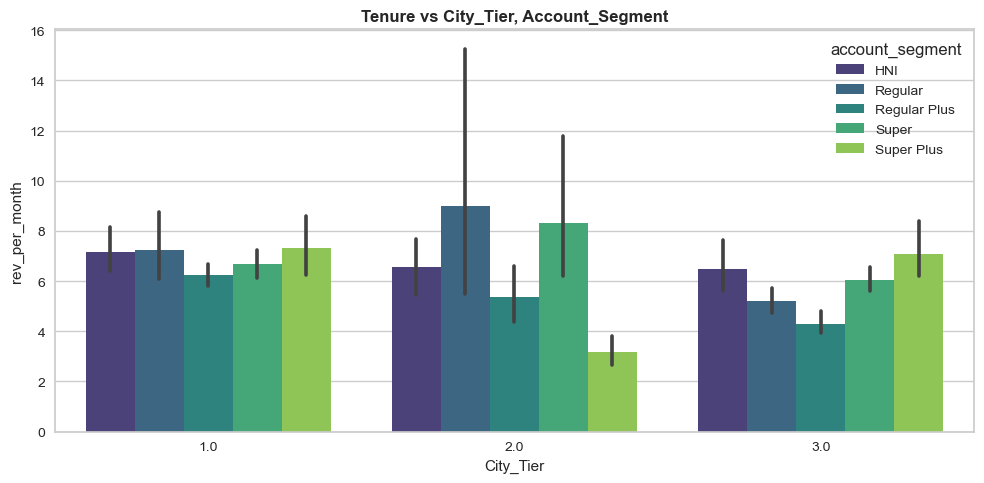

In [58]:
# @title
plt.figure(figsize=(10, 5))
plt.title("Tenure vs City_Tier, Account_Segment",fontweight='bold')
sns.barplot(data=data_correct_entries, hue='account_segment', y='rev_per_month',x='City_Tier',palette='viridis')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observations:**
**Revenue per Month across City Tiers and Account Segments**  
- Revenue per month varies across different city tiers and account segments.  
- In **City_Tier 1**, revenue is relatively uniform across account segments, with slight variations.  
- In **City_Tier 2**, "Super Plus" customers have the highest revenue, while "Regular Plus" has lower revenue with significant variance.  
- In **City_Tier 3**, revenue is lower overall, especially for "Regular" and "Regular Plus" segments.  

**Impact of Account Segments on Revenue**  
- "Super Plus" and "Super" segments generally have higher revenue per month across all city tiers.  
- "Regular Plus" and "Regular" segments show lower revenue, with some variations across cities.  
- "HNI" (High Net-worth Individuals) segment maintains consistent revenue but does not always lead in earnings.  

**City Tier Influence**  
- **City_Tier 2** shows the highest variance in revenue, with "Super Plus" having the highest revenue and "Regular Plus" being the lowest.  
- **City_Tier 3** has the lowest revenue across most account segments, suggesting location-based revenue differences.  

**Key Takeaways for Churn Prediction**  
- Customers in lower-revenue segments and city tiers might be more likely to churn.  
- "Super Plus" and "Super" customers are higher revenue generators and potentially more valuable for retention strategies.  
- City-based segmentation might help in targeted customer engagement strategies.  


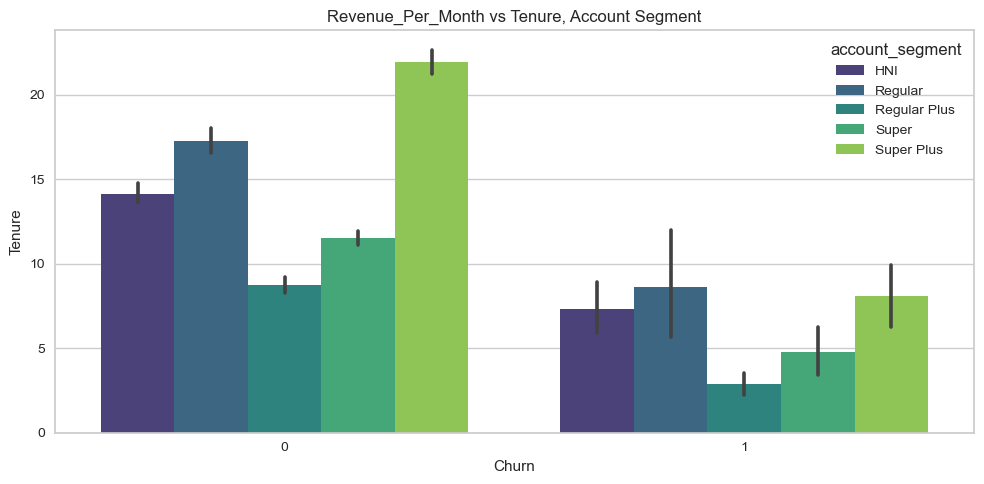

In [60]:
# @title
plt.figure(figsize=(10, 5))
plt.title("Revenue_Per_Month vs Tenure, Account Segment")
sns.barplot(data=data_correct_entries, hue='account_segment', y='Tenure',x='Churn',palette='viridis')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observations:**
**Impact of Tenure on Churn**  
- Customers who did **not churn (Churn = 0)** generally have **higher tenure** across all account segments.  
- Customers who **churned (Churn = 1)** tend to have significantly **lower tenure**, suggesting that newer customers are more likely to leave.  

**Account Segment Influence on Churn**  
- In the **non-churn group**, "Super Plus" customers have the highest tenure, followed by "Regular" and "HNI."  
- In the **churn group**, "Super Plus" and "Super" still maintain slightly higher tenure than other segments, but overall tenure is low.  
- "Regular Plus" customers show lower tenure in both churned and non-churned groups, which may indicate a more volatile customer base.  

**Revenue and Tenure Relationship**  
- Longer-tenured customers generally have higher revenue per month, particularly in "Super Plus" and "Regular" segments.  
- Churned customers have both **lower tenure and likely lower revenue**, which may suggest they did not engage with the service for long.  

**Key Takeaways for Churn Prediction**  
- **Early-stage customers are at a higher risk of churn**, indicating a need for targeted engagement and retention strategies.  
- **High-value segments (Super Plus, Super, and HNI) retain longer** but still have some churn, suggesting that retention strategies should focus on long-term engagement.  
- **Regular Plus customers may need more incentives** to stay engaged, as they show lower tenure and higher churn risk.  
- **Revenue-based segmentation combined with tenure insights can help prioritize retention efforts** by focusing on customers likely to generate long-term value.  


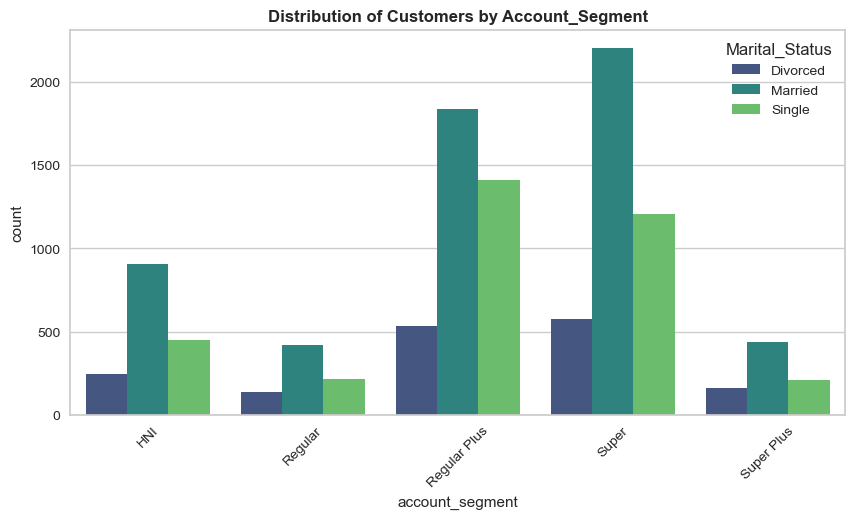

In [62]:
# @title
plt.figure(figsize=(10, 5))
sns.countplot(data=data_correct_entries, x="account_segment", hue='Marital_Status',palette="viridis")
plt.title("Distribution of Customers by Account_Segment",fontweight='bold')
plt.xticks(rotation=45)
plt.show()


**Observations:**
**General Distribution Trends**  
- The **Super** and **Regular Plus** segments have the highest number of customers.  
- The **HNI** and **Super Plus** segments have the lowest number of customers.  

**Marital Status Insights**  
- Across all account segments, **Married customers form the largest group**.  
- **Single customers are the second largest group**, followed by **Divorced customers**, who form the smallest proportion in all segments.  

**Account Segment Specific Observations**  
- **Super Segment:** Has the highest concentration of customers, with a majority being married, followed by single customers.  
- **Regular Plus Segment:** Also has a high number of customers, with a similar marital status distribution as the Super segment.  
- **HNI and Super Plus Segments:** Have fewer customers overall, but still follow the trend of married customers being the majority.  
- **Regular Segment:** Has the most balanced distribution among all segments, with fewer customers overall compared to Super and Regular Plus.  

**Key Takeaways for Customer Analysis and Retention Strategies**  
- **Married customers dominate across all account segments**, so marketing campaigns could focus on benefits for families or long-term financial planning.  
- **Single customers represent a significant share**, especially in higher-tier segments like Super and Regular Plus, indicating potential for targeted promotions.  
- **Divorced customers are the smallest group**, but their presence in all segments suggests a need for personalized engagement strategies.  


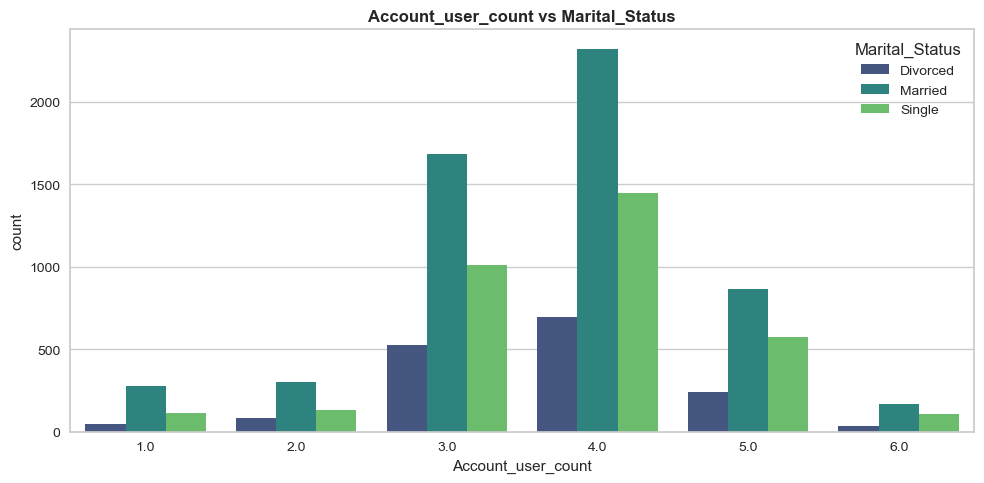

In [64]:
# @title

plt.figure(figsize=(10, 5))
plt.title("Account_user_count vs Marital_Status",fontweight='bold')
sns.countplot(data=data_correct_entries, x='Account_user_count',hue='Marital_Status', palette="viridis")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [65]:
data_correct_entries['Churn'] = data_correct_entries['Churn'].astype(int)

<Figure size 1000x1000 with 0 Axes>

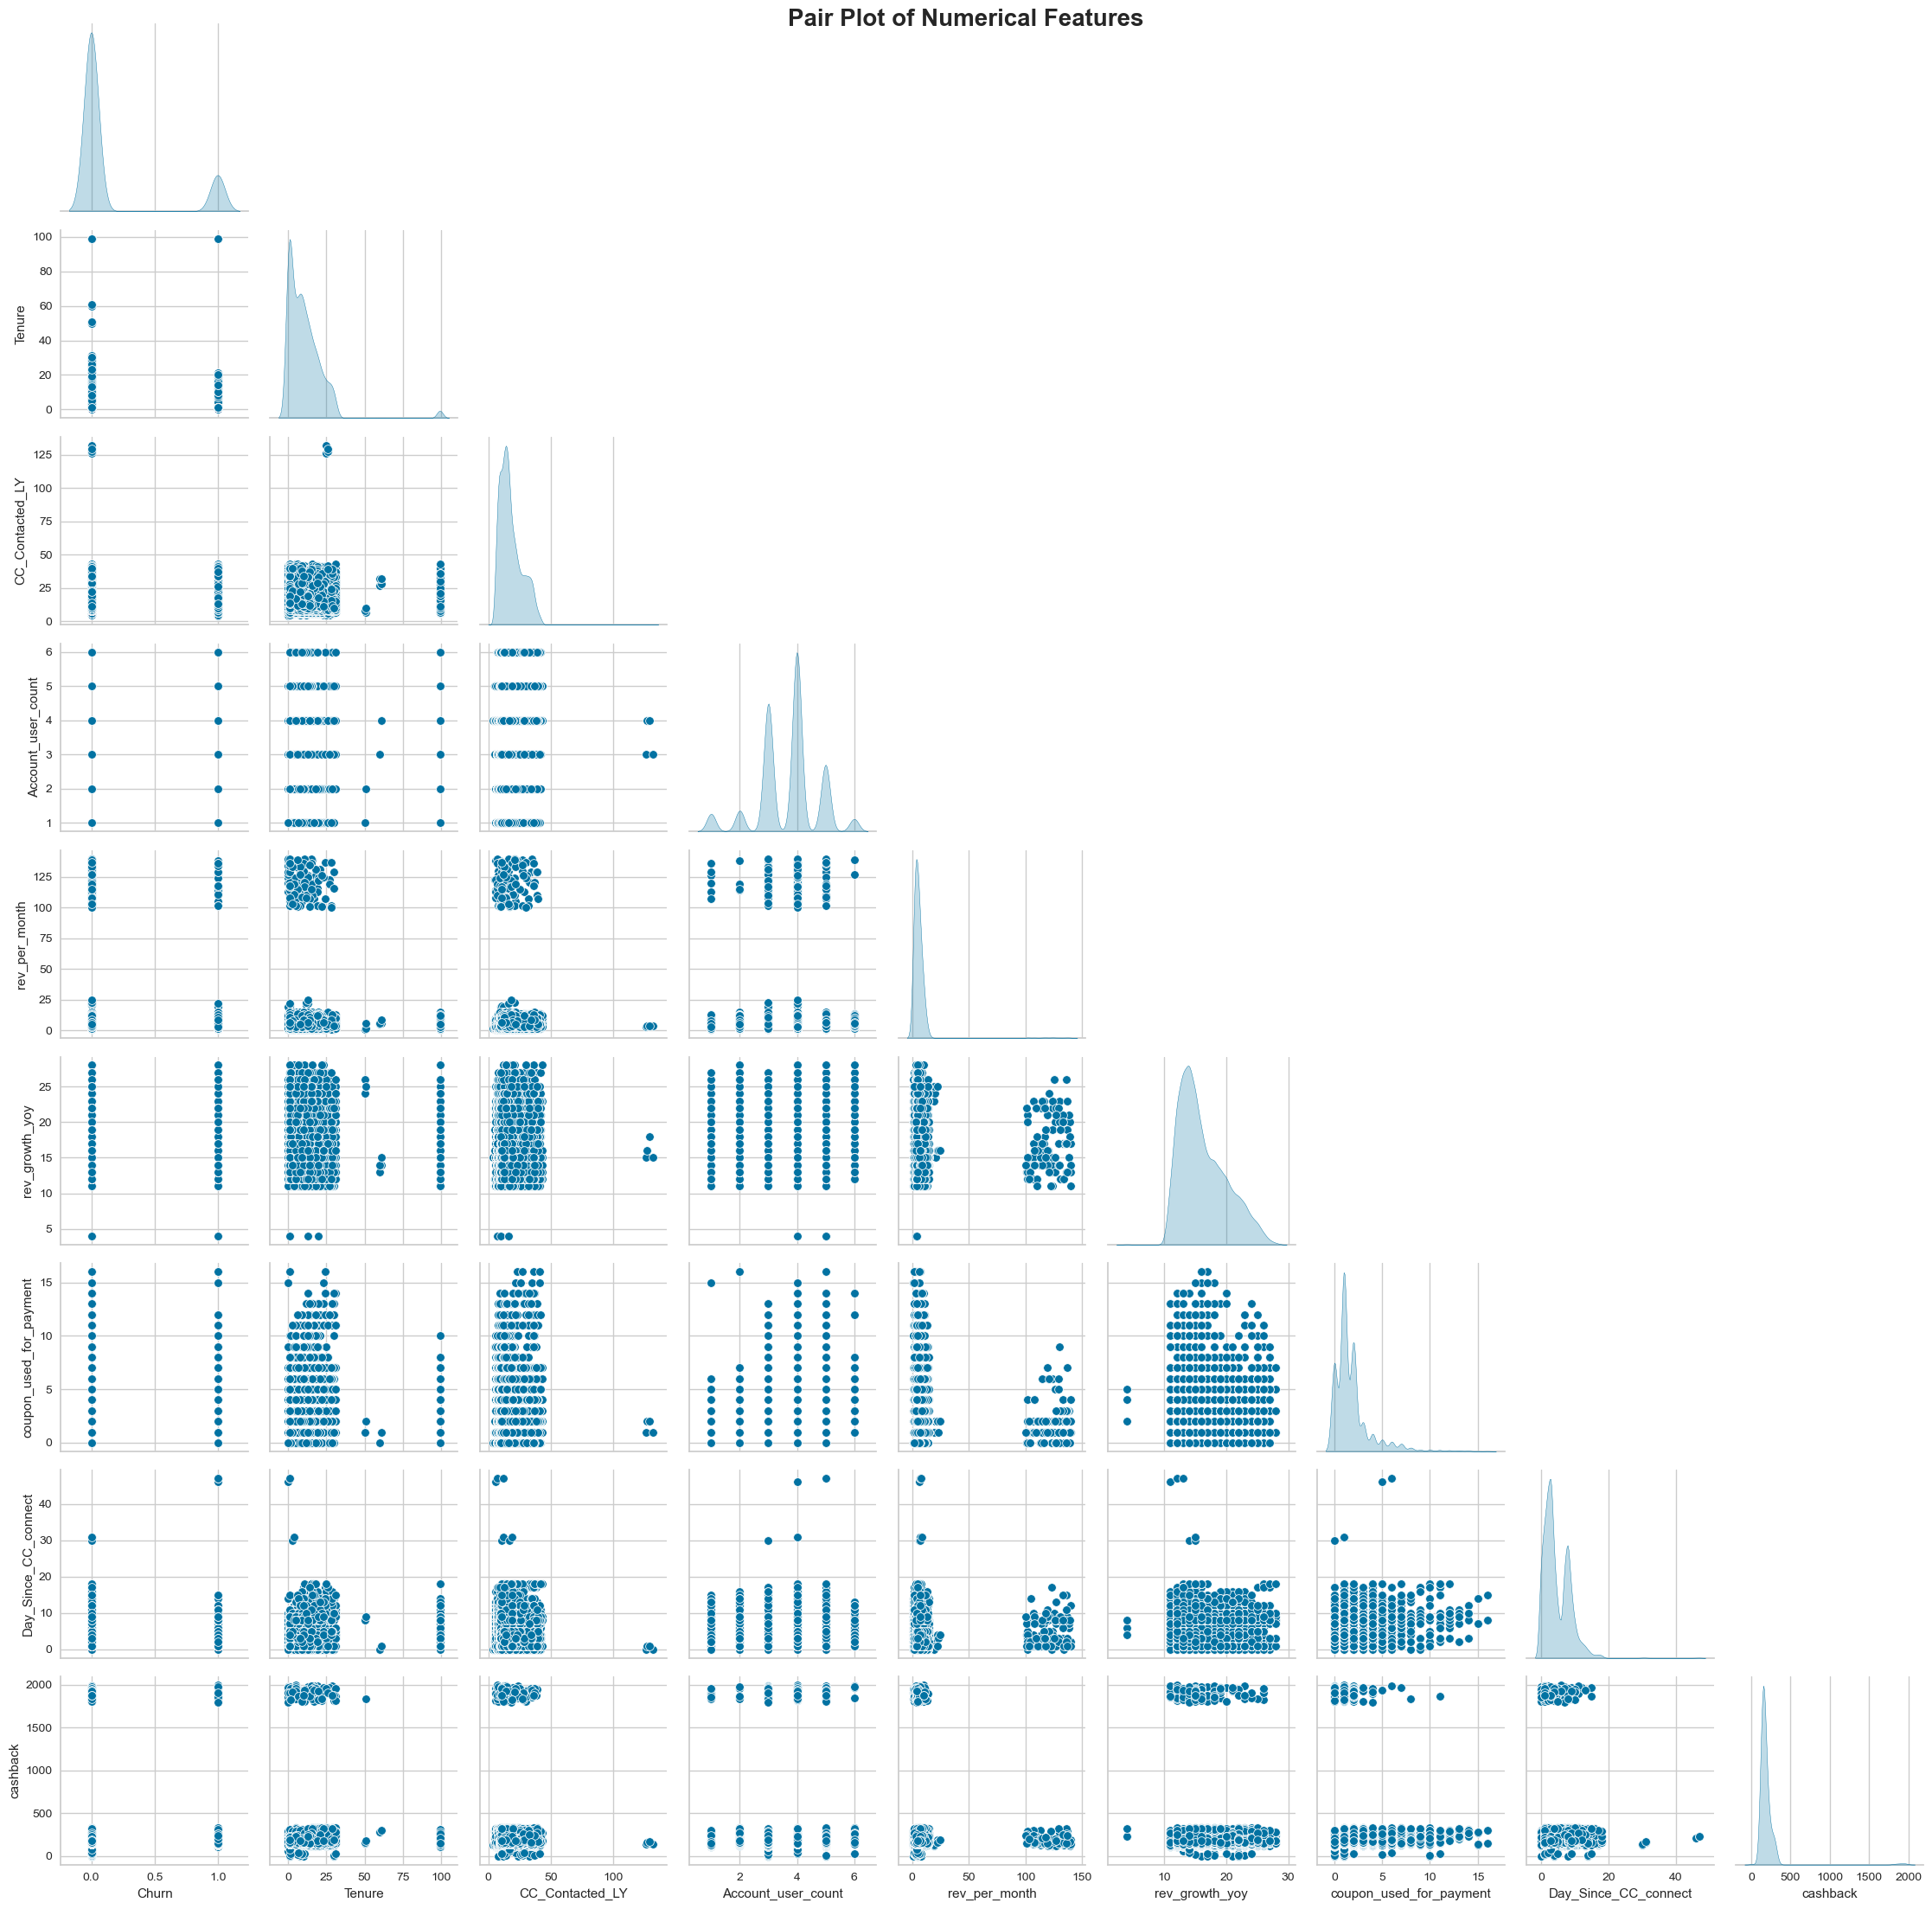

In [66]:
# @title
#considering these columns as numerical again to check the correlations
# pair plots for each numerical columns
plt.figure(figsize=(10,10));
pair_plot  = sns.pairplot(data=data_correct_entries, diag_kind="kde",corner=True)
pair_plot.fig.suptitle("Pair Plot of Numerical Features",fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()

**Observations:**

- Some features are highly skewed, such as cashback, which has a long right tail.
- Some features like rev_per_month and rev_growth_yoy might be good predictors for revenue-related outcomes.
- Customers with high coupon usage tend to have higher spending, which could influence churn or retention strategies.
- Tenure and revenue-related features (e.g., rev_per_month) have dense clusters, indicating concentration in specific value ranges.

In [68]:
data_overview(data_correct_entries)


**************************************************
Data - Structure

Shape 		:(11260, 18) 
Size 		:202680
Dimension 	:2


**************************************************
Data - Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  int32   
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  category
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  category
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  category
 10  Marital_Status           11048 non-null

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,DC,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,DC,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,DC,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,CC,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11250,0,3.0,1.0,40.0,CC,Female,4.0,5.0,Regular Plus,5.0,Single,5.0,0.0,17.0,1.0,5.0,164.85,Mobile
11251,1,14.0,3.0,37.0,Wallet,Male,3.0,5.0,HNI,5.0,Married,9.0,1.0,14.0,3.0,NaN,240.54,Mobile
11252,0,13.0,3.0,33.0,Wallet,Female,3.0,NaN,Super Plus,1.0,Married,4.0,0.0,12.0,4.0,7.0,252.31,Mobile
11253,0,5.0,1.0,17.0,CC,Male,4.0,4.0,Super,5.0,Single,3.0,0.0,20.0,2.0,8.0,227.36,Computer


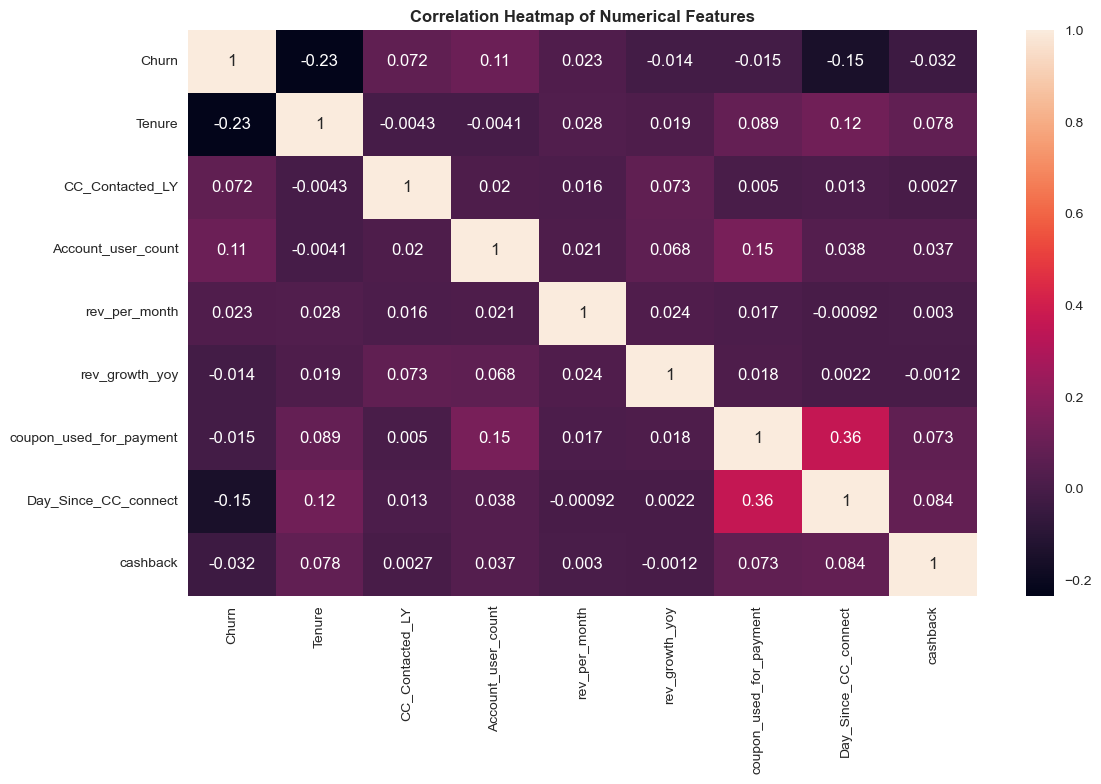

In [69]:
# @title
#Heatmap of all the columns displaying correlation coefficients
plt.figure(figsize=(12,8))
plt.title("Correlation Heatmap of Numerical Features",fontweight='bold')
num_columns = data_correct_entries.select_dtypes(exclude=["object","category"]).columns.to_list()
sns.heatmap(data_correct_entries[num_columns].corr(),annot=True)
plt.tight_layout()
plt.show()

**Observations:**

**Churn Correlations**  
- **Churn is negatively correlated with Tenure (-0.23)**, suggesting that customers with longer tenure are less likely to churn.  
- **Day_Since_CC_connect has a weak negative correlation with Churn (-0.15)**, implying that recent interactions with customer care might reduce churn.  
- Similarly, **Account_user_count** has a weak positive correlation with Churn (0.11)

**Tenure Correlations**  
- **Tenure has a weak positive correlation with Day_Since_CC_connect (0.12)**, indicating that long-tenured customers may have slightly more time since their last customer care interaction.  


**Customer Engagement & Revenue Relationships**  
- **Account_user_count and coupon_used_for_payment (0.15) indicate that accounts with more users are slightly more likely to use coupons for payment.**  
- **Day_Since_CC_connect and coupon_used_for_payment (0.36) have the highest correlation in the heatmap,** suggesting that customers who interact with customer care might be more likely to use coupons.  

**Revenue & Growth Trends**  
- **Revenue per month (rev_per_month) and revenue growth year-over-year (rev_growth_yoy) show minimal correlation with other factors**, indicating revenue trends are not strongly linked to churn, tenure, or account interactions.  

**Conclusion**  
- **Longer tenure reduces churn,** reinforcing the importance of retention strategies for new customers.  
- **Customer care interactions appear to influence coupon usage and churn,** suggesting proactive engagement could drive loyalty.  
- **Revenue-related features do not have strong correlations,** meaning other hidden factors may drive revenue growth.  


## **Data Preprocessing (Continued)**

### **Handling Columns with Missing Values**

In [73]:
# @title
### Checking for Missing Values
check_missing_values(data_correct_entries)


,Missing_Values,%_Missing_Values
rev_per_month,791,7.02
cashback,473,4.20
Account_user_count,444,3.94
Day_Since_CC_connect,358,3.18
Complain_ly,357,3.17
Login_device,221,1.96
Tenure,218,1.94
Marital_Status,212,1.88
CC_Agent_Score,116,1.03
City_Tier,112,0.99


**Observations:**

- There are several columns with missing values.
- We will treat missing values after checking their distribution

In [75]:
# @title

#Checking the distributions of the columns with missing values
df_col_with_missing_values = pd.DataFrame(check_missing_values(data_correct_entries))
df_col_with_missing_values.reset_index(inplace=True)
cols_with_missing_values = df_col_with_missing_values[df_col_with_missing_values['Missing_Values']>0]
cols_with_missing_values = cols_with_missing_values.iloc[:,0].to_list()
print(f'Columns with missing Values are : {cols_with_missing_values}')



Columns with missing Values are : ['rev_per_month', 'cashback', 'Account_user_count', 'Day_Since_CC_connect', 'Complain_ly', 'Login_device', 'Tenure', 'Marital_Status', 'CC_Agent_Score', 'City_Tier', 'Payment', 'Gender', 'CC_Contacted_LY', 'Service_Score', 'account_segment', 'rev_growth_yoy', 'coupon_used_for_payment']


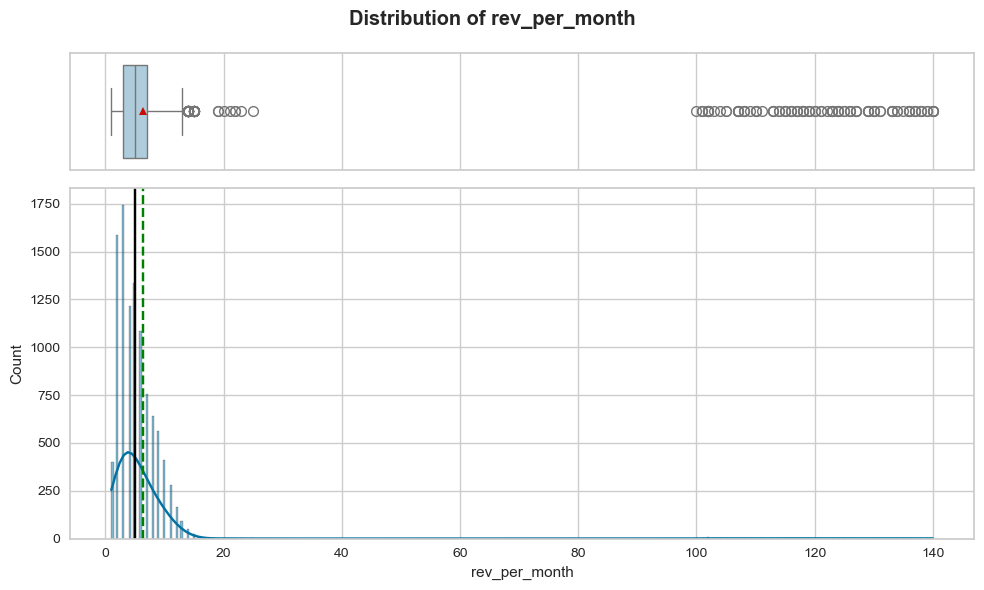

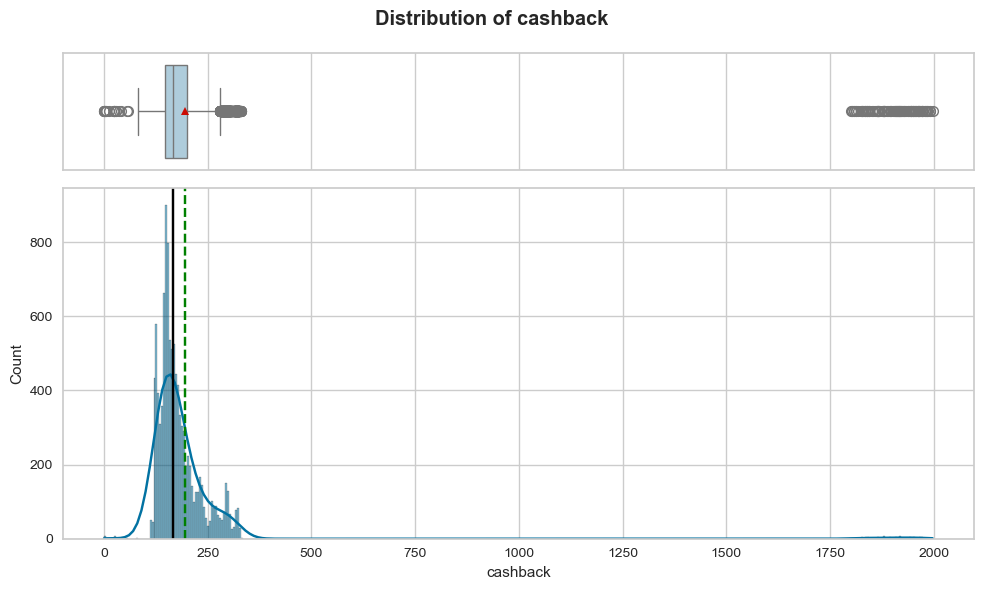

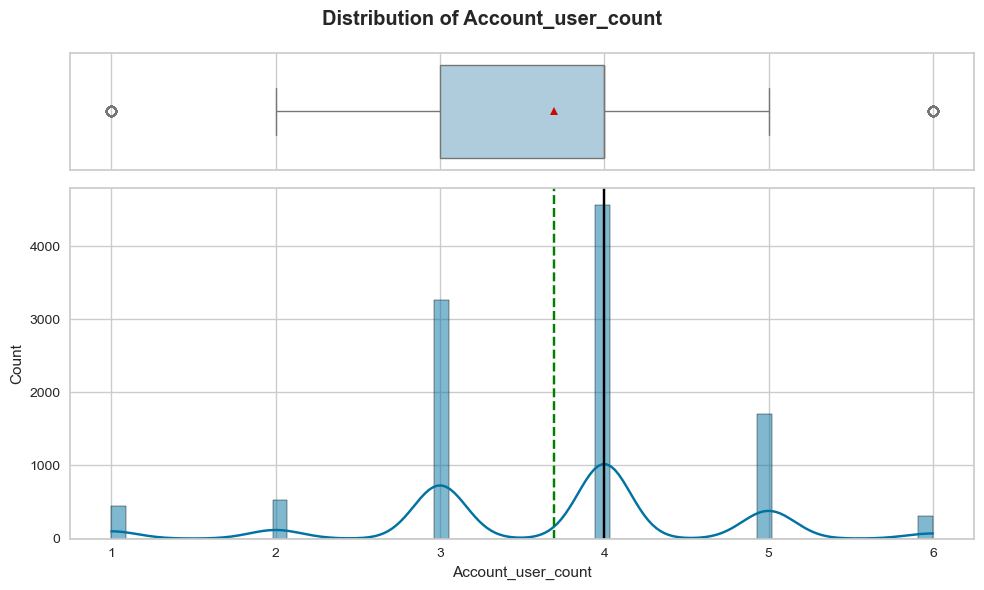

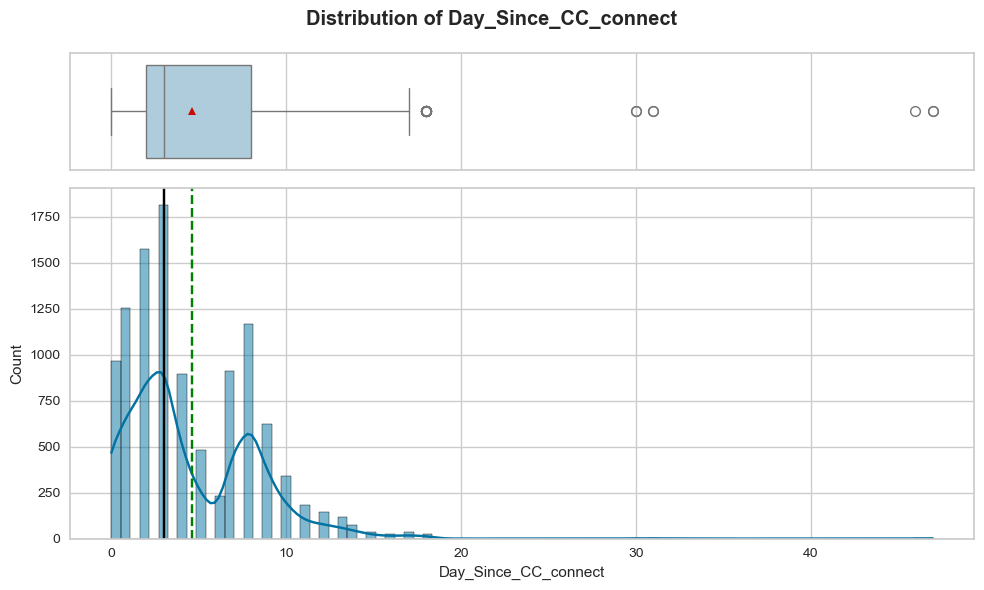

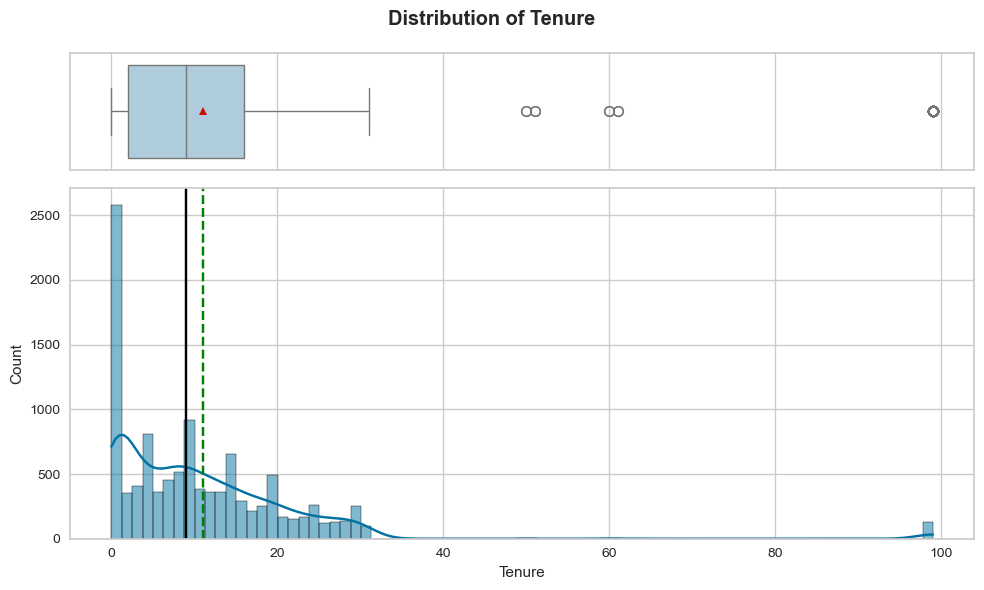

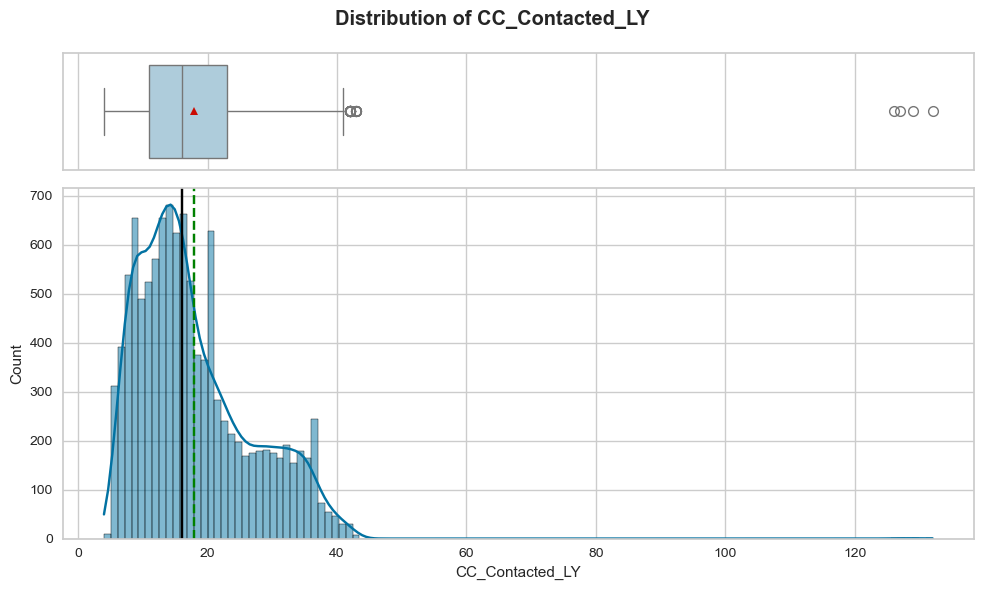

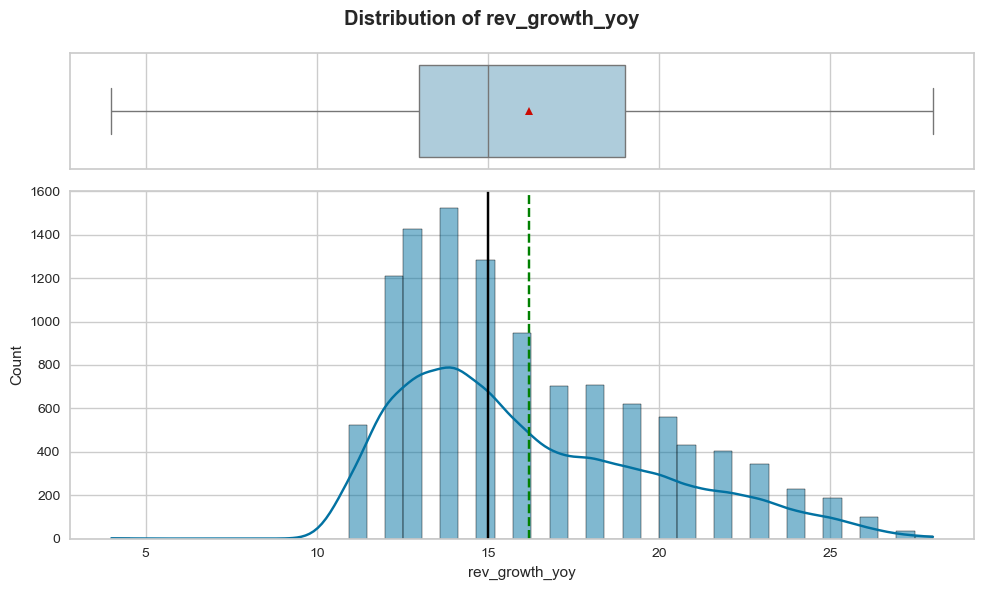

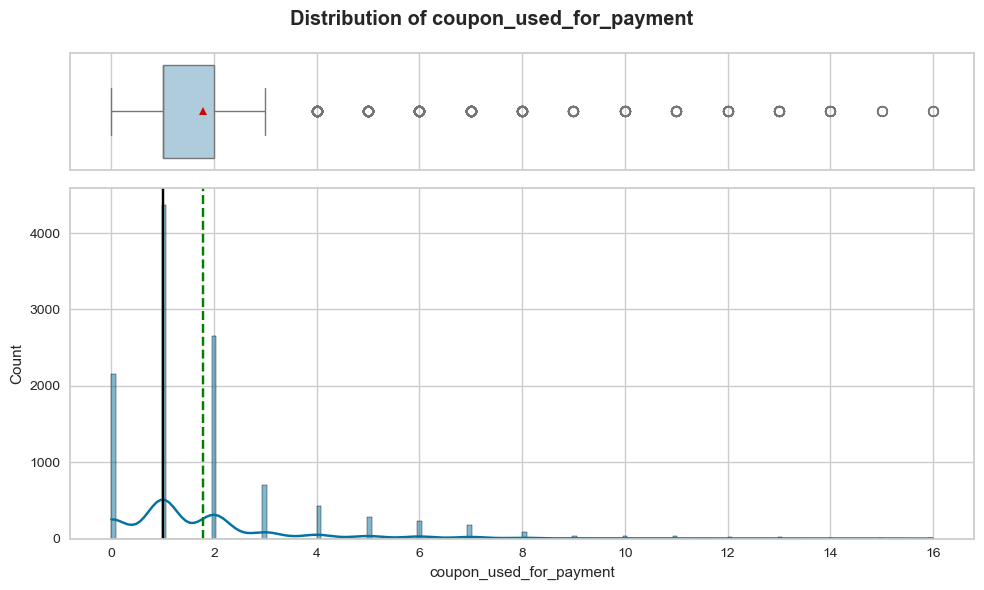

In [76]:
# @title
# # Checking the Distributions for all the Numerical Columns with missing Values
num_cols_with_missing_values = data_correct_entries[cols_with_missing_values].select_dtypes(exclude=["object","category"]).columns.to_list()
for col in num_cols_with_missing_values:
  histogram_boxplot(data_correct_entries,col )
  plt.tight_layout()
  plt.show()


**Observations:**

- **rev_per_month, cashback, Day_Since_CC_connect, Tenure, CC_Contacted_LY:** distributions are skewed and having outliers. We will impute the missing values in these numerical columns with median value.

- **Service_Score, CC_Agent_Score, City_Tier, Complain_ly, Marital_Status, Payment, Login_device, Gender, account_segment:** are all ategorical/ordinal in nature, missing values can be replaced with the most common values. We will impute them with mode value.

- **coupon_used_for_payment:** Since the data is heavily skewed, using the median (instead of mean) will prevent bias due to outliers.

- **rev_growth_yoy:** Mean Imputation is Suitable in this column because the distribution is fairly normal without extreme outliers

- **Account_user_count:** Given the multimodal distribution, Mode imputation will be suitable for this categorical count-like variables.


In [78]:
# @title
# imputing the numerical columns that are having skewed distribution or the presence of outliers
cols_for_median_imputation = ['rev_per_month', 'cashback', 'Day_Since_CC_connect', 'Tenure', 'CC_Contacted_LY','coupon_used_for_payment']
for col in cols_for_median_imputation:
  data_correct_entries[col].fillna(data_correct_entries[col].median(),inplace=True)

# imputing the categorical columns with mode value
cols_for_mode_imputation = ['Account_user_count', 'Complain_ly', 'Marital_Status', 'CC_Agent_Score', 'City_Tier', 'Payment', 'Service_Score','Login_device','Gender','account_segment']
for col in cols_for_mode_imputation:
  data_correct_entries[col].fillna(data_correct_entries[col].mode()[0],inplace=True)

# imputing rev_growth_yoy column with mean value
data_correct_entries['rev_growth_yoy'].fillna(data_correct_entries['rev_growth_yoy'].mean(),inplace=True)

print('Imputation done for all the columns with missing values')

Imputation done for all the columns with missing values


In [79]:
# @title
check_missing_values(data_correct_entries)

,Missing_Values,%_Missing_Values
Churn,0,0.0
Tenure,0,0.0
cashback,0,0.0
Day_Since_CC_connect,0,0.0
coupon_used_for_payment,0,0.0
rev_growth_yoy,0,0.0
Complain_ly,0,0.0
rev_per_month,0,0.0
Marital_Status,0,0.0
CC_Agent_Score,0,0.0


In [80]:

data_preprocessed = data_correct_entries.copy()

#Saving the data for Tableau visualizations
data_preprocessed.to_csv(os.path.join(parent_dir,'data','processed','data_preprocessed.csv'),index=False)
print("Saved the Raw data to : ../data/processed/data_preprocessed.csv")

Saved the Raw data to : ../data/processed/data_preprocessed.csv


### **Train-Test Split**

We will be doing the Train-Test split before going to Outlier treatment.

If you clean and preprocess the entire dataset before splitting:

- You risk data leakage because the test set information  is used during training.

- Your model's performance metrics may be overly optimistic and not reflective of real-world performance.

In [83]:
# @title
#taking backup before treating outliers
data_before_outliers = data_correct_entries.copy()

X = data_correct_entries.drop('Churn',axis=1)
y = data_correct_entries['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
6135,0.0,1.0,8.0,DC,Male,2.0,4.0,Super,2.0,Divorced,10.0,0.0,22.0,2.0,2.0,154.75,Mobile
8088,5.0,1.0,9.0,COD,Male,3.0,3.0,Super,5.0,Married,9.0,0.0,15.0,0.0,2.0,146.87,Computer
1313,0.0,3.0,15.0,Wallet,Male,2.0,3.0,Regular Plus,5.0,Married,2.0,0.0,19.0,1.0,0.0,165.25,Computer
10426,1.0,1.0,38.0,DC,Female,4.0,4.0,Regular Plus,4.0,Married,3.0,1.0,21.0,7.0,9.0,148.22,Computer
10924,9.0,1.0,16.0,DC,Male,4.0,5.0,Regular Plus,1.0,Married,6.0,0.0,19.0,2.0,2.0,151.90,Mobile


In [85]:
X_test.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
6926,20.0,1.0,12.0,CC,Female,3.0,3.0,HNI,4.0,Married,3.0,0.0,19.0,0.0,12.0,225.57,Computer
1669,3.0,1.0,34.0,CC,Female,3.0,3.0,Super,1.0,Married,2.0,0.0,13.0,1.0,9.0,157.75,Mobile
9498,1.0,3.0,12.0,CC,Female,3.0,4.0,Regular Plus,3.0,Single,5.0,0.0,22.0,1.0,3.0,154.83,Mobile
3287,16.0,1.0,7.0,DC,Female,3.0,5.0,Super,2.0,Divorced,11.0,1.0,14.0,1.0,3.0,165.25,Mobile
2973,29.0,1.0,27.0,COD,Male,3.0,4.0,Super,2.0,Divorced,5.0,1.0,20.0,2.0,9.0,179.15,Mobile


### **Handling Outliers**

We will be performing Outlier Treatment only on Training set

In [88]:
# @title
X_train_num_columns = X_train.select_dtypes(exclude=["object","category"]).columns.to_list()
print(f'Numeric Columns:\n{X_train_num_columns}\n')

Numeric Columns:
['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']



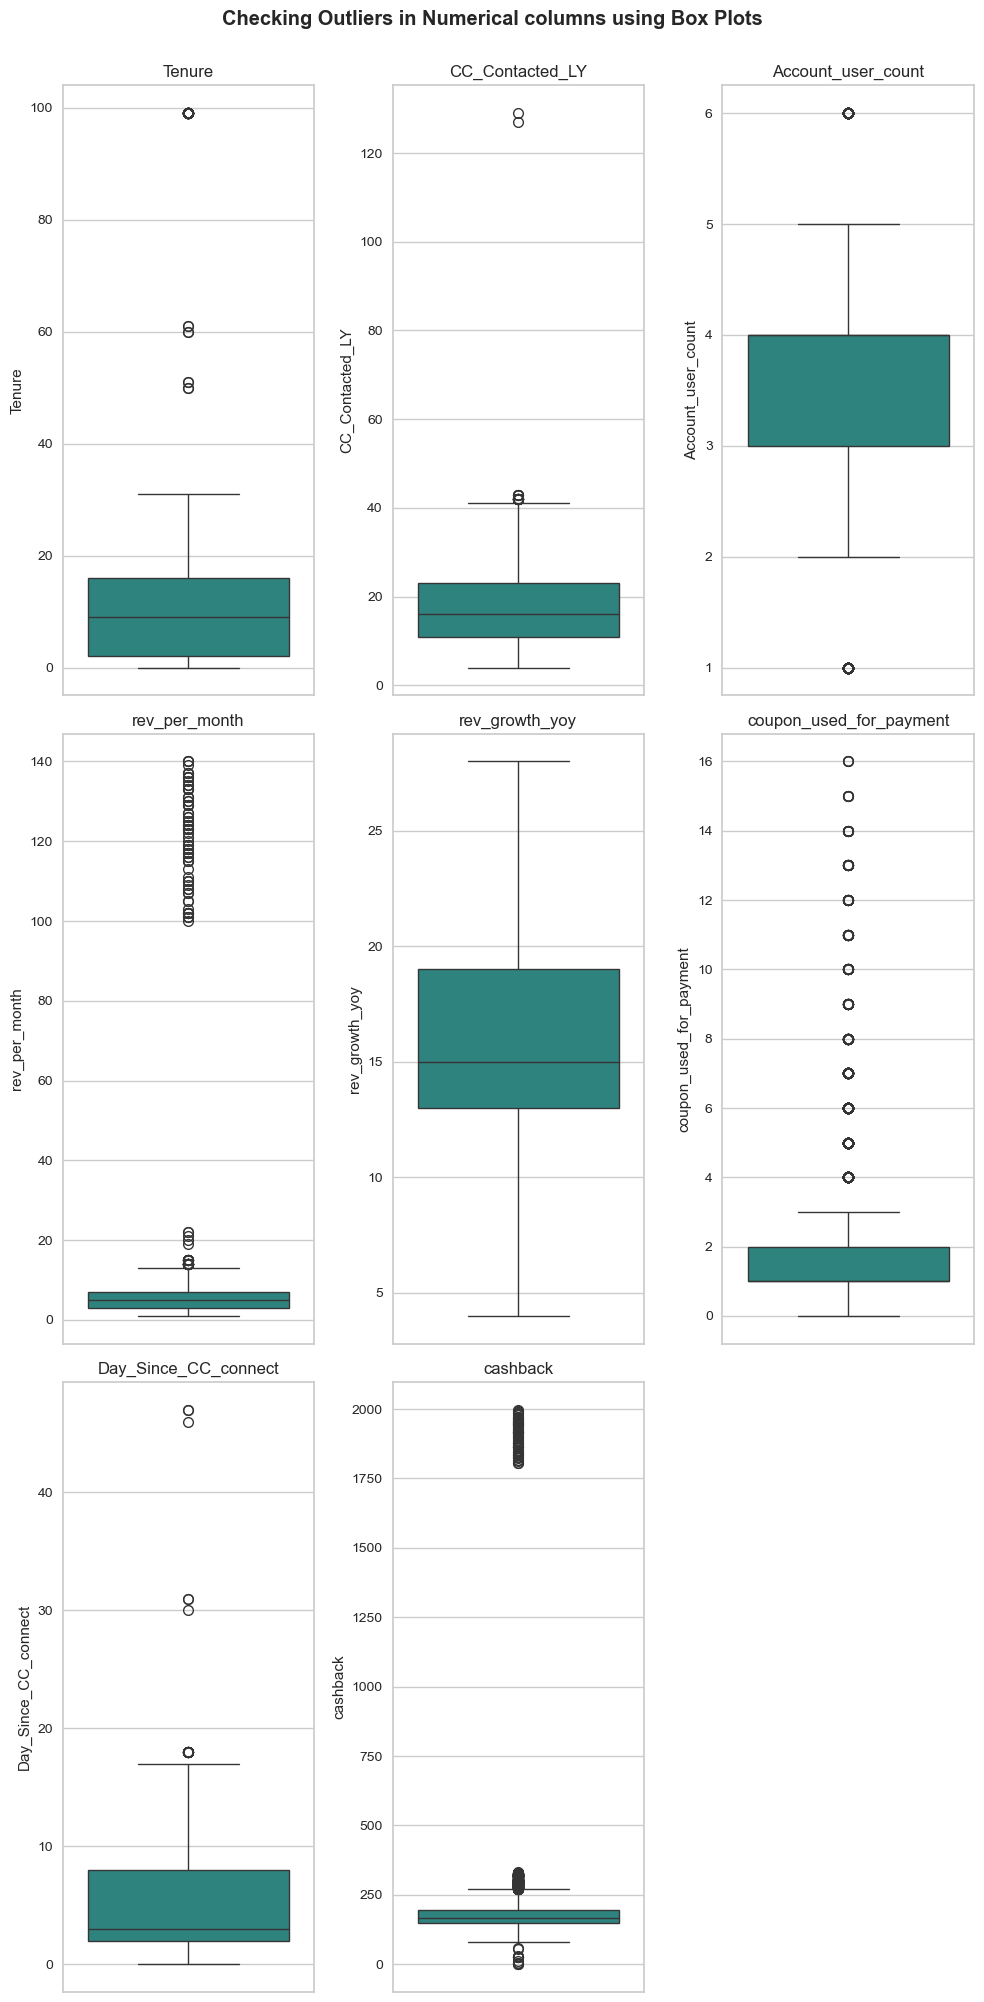

In [89]:
# Visually checking distributions

def outlier_validation(df,cols_list):
  fig, axes = plt.subplots((len(cols_list)//3+1),3,figsize=(10, 20))
  axes = axes.flatten()
  fig.suptitle('Checking Outliers in Numerical columns using Box Plots',fontweight='bold', y=1)
  for i, col in enumerate(cols_list):
      if col=='Churn':
        axes[i].set_visible(False)
      else:
        sns.boxplot(df[col], whis=1.5, ax=axes[i], palette="viridis")
        axes[i].set_title(col)

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()


outlier_validation(X_train,X_train_num_columns)

In [90]:
# @title
# Function to calculate and display outlier values

def outlier_values(df,col):
    '''
    Calculate and display outlier values which are > 4*IQR
    '''
    print('\033[1mDetermining outlier values for: {}\033[0m'.format(col))
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    col_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'\nQ1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {col_4iqr}')
    outlier_vals = df.loc[np.abs(df[col] - df[col].median()) > col_4iqr, col]
    print('\nOutlier values:\n',np.sort(outlier_vals.unique()))
    print('\n')

for i in X_train_num_columns:
    outlier_values(X_train,i)

Determining outlier values for: Tenure

Q1 = 2.0, Q3 = 16.0, 4*IQR = 56.0

Outlier values:
 [99.]


Determining outlier values for: CC_Contacted_LY

Q1 = 11.0, Q3 = 23.0, 4*IQR = 48.0

Outlier values:
 [127. 129.]


Determining outlier values for: Account_user_count

Q1 = 3.0, Q3 = 4.0, 4*IQR = 4.0

Outlier values:
 []


Determining outlier values for: rev_per_month

Q1 = 3.0, Q3 = 7.0, 4*IQR = 16.0

Outlier values:
 [ 22. 100. 101. 102. 103. 105. 107. 108. 109. 110. 111. 113. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 129. 130. 131.
 133. 134. 135. 136. 137. 139. 140.]


Determining outlier values for: rev_growth_yoy

Q1 = 13.0, Q3 = 19.0, 4*IQR = 24.0

Outlier values:
 []


Determining outlier values for: coupon_used_for_payment

Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0

Outlier values:
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Determining outlier values for: Day_Since_CC_connect

Q1 = 2.0, Q3 = 8.0, 4*IQR = 24.0

Outlier values:
 [30. 31. 46. 47.]


Determining 

**Observations:**
 - **Tenure**
  - **Treatment:** Capping at 99th percentile  
  - **Reason:** Extremely high tenure values (>60 months) are rare and might distort analysis.  

  **rev_growth_yoy**
- **Treatment:** Capping at 99th percentile  
- **Reason:** Extreme revenue growth values (>25%) may not be realistic and should be limited.  

  **Day_Since_CC_Connect**
- **Treatment:** Capping at 99th percentile  
- **Reason:** Values above 30 days are rare cases and could skew results.  

  **coupon_used_for_payment**
- **Treatment:** Capping at 95th percentile  
- **Reason:** Excessive coupon usage (>8) is rare and should be capped.  

  **cashback**
- **Treatment:** Log transformation  
- **Reason:** Cashback values above 500 are extreme, and log transformation normalizes distribution.  

  **CC_Contacted_LY**
- **Treatment:** Capping at 99th percentil  
- **Reason:** Values >50 indicate excessive complaints, which are unlikely and may be data errors.  

  **rev_per_month**
- **Treatment:** Log transformation  
- **Reason:** High revenue values (>100) might distort analysis, requiring transformation.  



In [92]:
X_train_treated_outliers = X_train.copy()


In [93]:
#Treating outliers by capping
X_train_treated_outliers['Tenure'] = np.where(X_train_treated_outliers['Tenure'] > X_train_treated_outliers['Tenure'].quantile(0.99), X_train_treated_outliers['Tenure'].quantile(0.99), X_train_treated_outliers['Tenure'])
X_train_treated_outliers['rev_growth_yoy'] = np.where(X_train_treated_outliers['rev_growth_yoy'] > X_train_treated_outliers['rev_growth_yoy'].quantile(0.99), X_train_treated_outliers['rev_growth_yoy'].quantile(0.99), X_train_treated_outliers['rev_growth_yoy'])
X_train_treated_outliers['Day_Since_CC_connect'] = np.where(X_train_treated_outliers['Day_Since_CC_connect'] > X_train_treated_outliers['Day_Since_CC_connect'].quantile(0.99), X_train_treated_outliers['Day_Since_CC_connect'].quantile(0.99), X_train_treated_outliers['Day_Since_CC_connect'])
X_train_treated_outliers['coupon_used_for_payment'] = np.where(X_train_treated_outliers['coupon_used_for_payment'] > X_train_treated_outliers['coupon_used_for_payment'].quantile(0.95), X_train_treated_outliers['coupon_used_for_payment'].quantile(0.99), X_train_treated_outliers['coupon_used_for_payment'])
X_train_treated_outliers['CC_Contacted_LY'] = np.where(X_train_treated_outliers['CC_Contacted_LY'] > X_train_treated_outliers['CC_Contacted_LY'].quantile(0.99), X_train_treated_outliers['CC_Contacted_LY'].quantile(0.99), X_train_treated_outliers['CC_Contacted_LY'])
X_train_treated_outliers['cashback'] = np.where(X_train_treated_outliers['cashback'] > X_train_treated_outliers['cashback'].quantile(0.99), X_train_treated_outliers['cashback'].quantile(0.99), X_train_treated_outliers['cashback'])
#Treating outliers by log transformation
X_train_treated_outliers['rev_per_month'] = np.log1p(X_train_treated_outliers['rev_per_month'])

print("Treated all the outliers in the Training Set")


Treated all the outliers in the Training Set


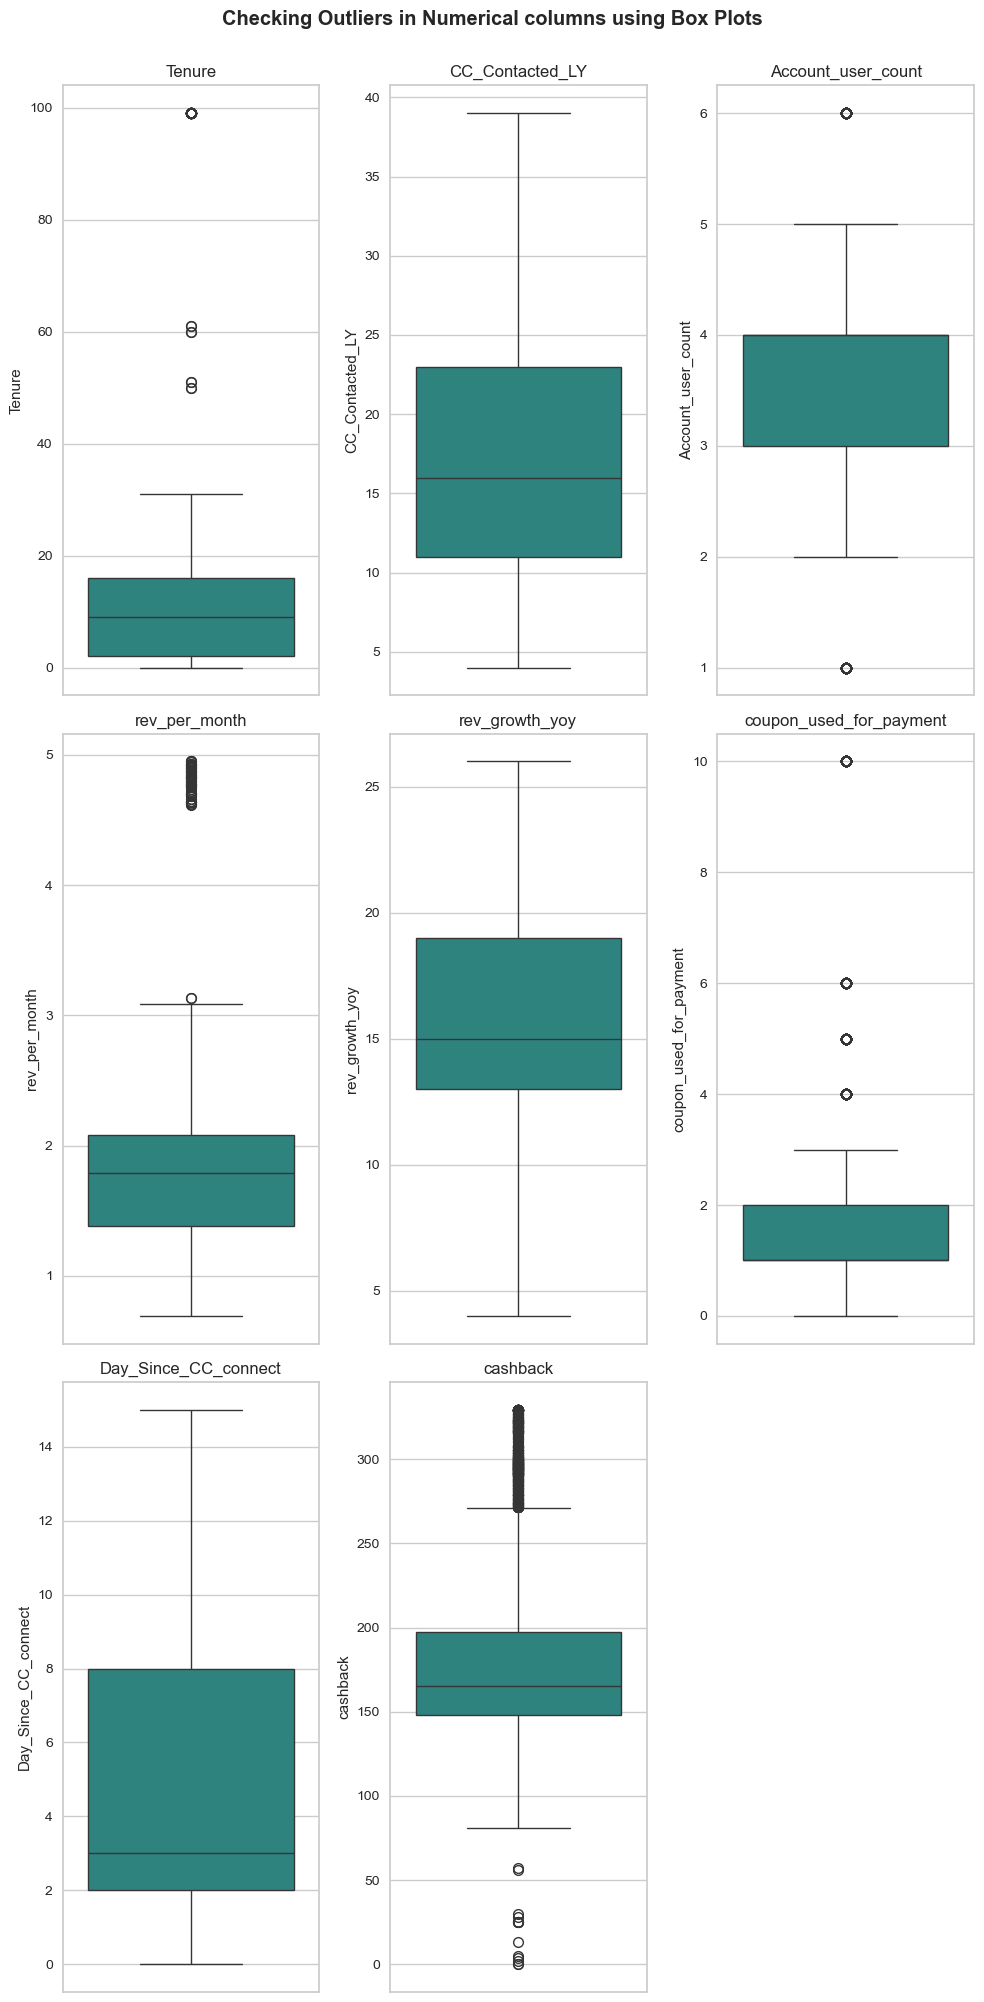

In [94]:
# @title
#Checking Outliers post treatment
outlier_validation(X_train_treated_outliers,X_train_num_columns)

In [95]:
# @title
X_train_treated_outliers.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
6135,0.0,1.0,8.0,DC,Male,2.0,4.0,Super,2.0,Divorced,2.397895,0.0,22.0,2.0,2.0,154.75,Mobile
8088,5.0,1.0,9.0,COD,Male,3.0,3.0,Super,5.0,Married,2.302585,0.0,15.0,0.0,2.0,146.87,Computer
1313,0.0,3.0,15.0,Wallet,Male,2.0,3.0,Regular Plus,5.0,Married,1.098612,0.0,19.0,1.0,0.0,165.25,Computer
10426,1.0,1.0,38.0,DC,Female,4.0,4.0,Regular Plus,4.0,Married,1.386294,1.0,21.0,10.0,9.0,148.22,Computer
10924,9.0,1.0,16.0,DC,Male,4.0,5.0,Regular Plus,1.0,Married,1.945910,0.0,19.0,2.0,2.0,151.90,Mobile


### **Feature Engineering**

In [97]:
# @title
data_feature_engg = X_train_treated_outliers.copy()

In [98]:
#concatinating data_feature_engg with y_train
data_feature_engg = pd.concat([data_feature_engg,y_train],axis=1)

In [99]:
#Saving the file with data_train_treated_outliers
data_feature_engg.to_csv(os.path.join(parent_dir,'data','processed','data_train_treated_outliers.csv'),index=False)
print("Saved the data post outlier treatment to ../data/processed/data_train_treated_outliers.csv")

Saved the data post outlier treatment to ../data/processed/data_train_treated_outliers.csv


In [100]:
# @title
data_feature_engg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8445 entries, 6135 to 7270
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Tenure                   8445 non-null   float64 
 1   City_Tier                8445 non-null   category
 2   CC_Contacted_LY          8445 non-null   float64 
 3   Payment                  8445 non-null   category
 4   Gender                   8445 non-null   category
 5   Service_Score            8445 non-null   category
 6   Account_user_count       8445 non-null   float64 
 7   account_segment          8445 non-null   category
 8   CC_Agent_Score           8445 non-null   category
 9   Marital_Status           8445 non-null   category
 10  rev_per_month            8445 non-null   float64 
 11  Complain_ly              8445 non-null   category
 12  rev_growth_yoy           8445 non-null   float64 
 13  coupon_used_for_payment  8445 non-null   float64 
 14  Day_Since_

In [101]:
data_feature_engg.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
6135,0.0,1.0,8.0,DC,Male,2.0,4.0,Super,2.0,Divorced,2.397895,0.0,22.0,2.0,2.0,154.75,Mobile,0
8088,5.0,1.0,9.0,COD,Male,3.0,3.0,Super,5.0,Married,2.302585,0.0,15.0,0.0,2.0,146.87,Computer,0
1313,0.0,3.0,15.0,Wallet,Male,2.0,3.0,Regular Plus,5.0,Married,1.098612,0.0,19.0,1.0,0.0,165.25,Computer,1
10426,1.0,1.0,38.0,DC,Female,4.0,4.0,Regular Plus,4.0,Married,1.386294,1.0,21.0,10.0,9.0,148.22,Computer,1
10924,9.0,1.0,16.0,DC,Male,4.0,5.0,Regular Plus,1.0,Married,1.945910,0.0,19.0,2.0,2.0,151.90,Mobile,0


#### **Loyalty_Score**

Loyalty Score can be derived based on the available features as below:

  **Loyalty_Score** = (Tenure / max(Tenure))
    + (coupon_used_l12m / max(coupon_used_l12m))
    + (rev_per_month / max(rev_per_month))
    + (cashback_l12m / max(cashback_l12m))
    - (Complain_l12m / max(Complain_l12m))

Where:

Loyalty Score is normalized between 0 and 1.

In [104]:
#Creating Loyalty Score feature

data_feature_engg['Loyalty_Score'] = (data_feature_engg['Tenure']/data_feature_engg['Tenure'].max()) + (data_feature_engg['coupon_used_for_payment']/data_feature_engg['coupon_used_for_payment'].max()) + (data_feature_engg['rev_per_month']/data_feature_engg['rev_per_month'].max()) + (data_feature_engg['cashback']/data_feature_engg['cashback'].max()) - (data_feature_engg['CC_Contacted_LY']/data_feature_engg['CC_Contacted_LY'].max())

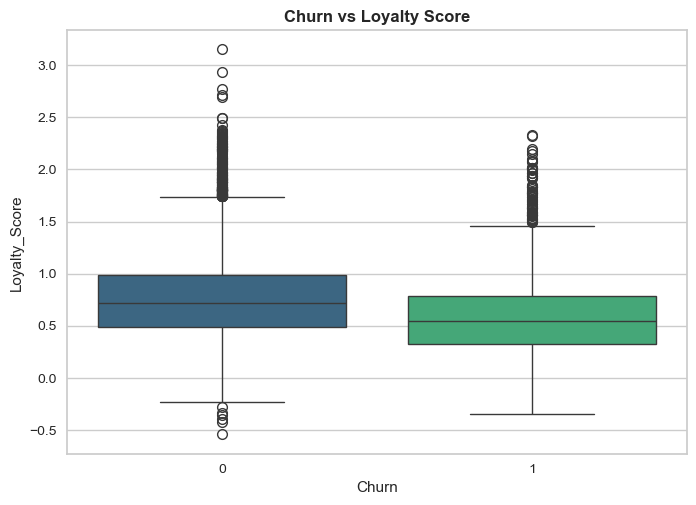

In [105]:


sns.boxplot(data= data_feature_engg,x='Churn',y='Loyalty_Score',palette='viridis')
plt.title("Churn vs Loyalty Score",fontweight='bold')
plt.show()

histogram_boxplot(data_feature_engg,'Loyalty_Score')


In [106]:
#Calculate Correlation with Target Variable using Point-Serial Method:
correlation_before, _ = pointbiserialr(data_feature_engg['Loyalty_Score'], data_feature_engg['Churn'])
print(f"Correlation with Churn: {correlation_before:.3f}")



Correlation with Churn: -0.152


**Observations**
- Customers with lower loyalty scores appear to have a higher churn rate.
The median loyalty score for churned customers (1) is lower than for non-churned customers (0).
- The distribution suggests a negative correlation, meaning higher loyalty scores tend to reduce churn.

#### **Tenure_Group**

In [109]:
# @title
#Tenure
# Creating bins for Tenure column
bins = [0, 4, 7, 13, 25, 100]
labels = ['New (0-3 Months)',
          'Early (4-6 Months)',
          'Growing (7-12 Months)',
          'Established (1-2 Years)',
          'Loyal (2+ Years)']
data_feature_engg['Tenure_Group'] = pd.cut(data_feature_engg['Tenure'], bins=bins, labels=labels, right=False)


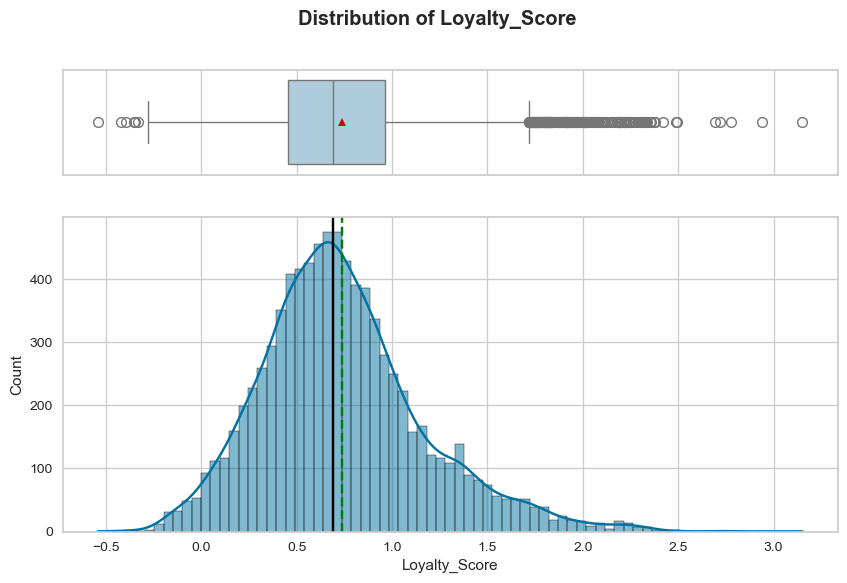

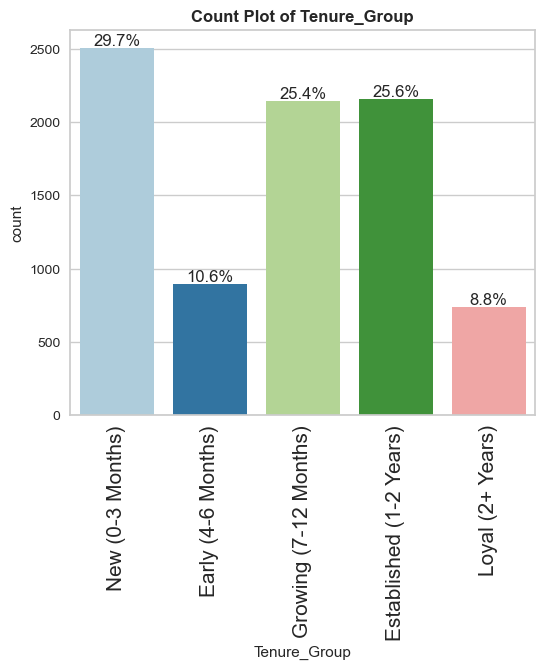

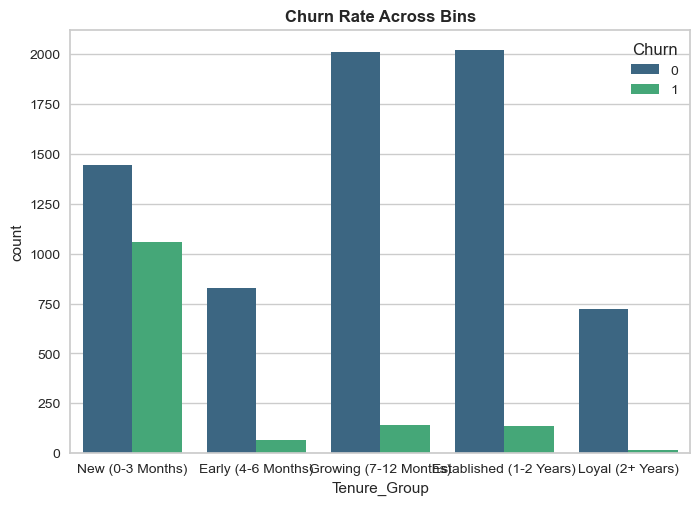

In [110]:
labeled_barplot(data_feature_engg,'Tenure_Group')

# Churn rate across bins
sns.countplot(x='Tenure_Group', hue='Churn', data=data_feature_engg, palette = 'viridis')
plt.title("Churn Rate Across Bins",fontweight='bold')
plt.show()

In [111]:
#Calculate Correlation Before Binning:
correlation_before, _ = pointbiserialr(data_feature_engg['Tenure'], data_feature_engg['Churn'])
print(f"Correlation before binning: {correlation_before:.3f}")

# Calculate Correlation After Binning:
#Cramer's V for binned variable to
contingency_table = pd.crosstab(data_feature_engg['Tenure_Group'], data_feature_engg['Churn'])

# Check if the contingency table is empty before proceeding
if contingency_table.empty:
    print("Contingency table is empty. Check binning or missing values.")
else:
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"Cramer's V after binning: {cramers_v:.3f}")

Correlation before binning: -0.228
Cramer's V after binning: 0.444


**Observations**
- The original Tenure column had a weak negative correlation (-0.228) with churn, indicating that longer tenure was slightly associated with lower churn.

- The binned Tenure_Group column has a much stronger correlation (Cramer's V = 0.444) with churn, indicating that the binned variable is now a significant predictor of churn.

- Binning captured non-linear relationships and threshold effects in the data. For example:
 - New customers (0-3 months) might have a higher churn rate.
 - Loyal customers (2+ years) might have a much lower churn rate.
- The binned variable now represents distinct customer segments with different churn behaviors.

So we will be dropping the Tenure and keeping the new feature instead

In [113]:
data_feature_engg.drop('Tenure',axis=1,inplace=True)

In [114]:
data_feature_engg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8445 entries, 6135 to 7270
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City_Tier                8445 non-null   category
 1   CC_Contacted_LY          8445 non-null   float64 
 2   Payment                  8445 non-null   category
 3   Gender                   8445 non-null   category
 4   Service_Score            8445 non-null   category
 5   Account_user_count       8445 non-null   float64 
 6   account_segment          8445 non-null   category
 7   CC_Agent_Score           8445 non-null   category
 8   Marital_Status           8445 non-null   category
 9   rev_per_month            8445 non-null   float64 
 10  Complain_ly              8445 non-null   category
 11  rev_growth_yoy           8445 non-null   float64 
 12  coupon_used_for_payment  8445 non-null   float64 
 13  Day_Since_CC_connect     8445 non-null   float64 
 14  cashback  

### **Data Scaling**

Scaling ensures that numerical features have similar ranges, improving model performance. We will be using **Z-score Normalization** as Standardization technique

In [117]:

X_train_scaled = data_feature_engg.copy().drop('Churn',axis=1)
y_train_scaled = data_feature_engg['Churn']

In [118]:
X_train_scaled.head()

,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Loyalty_Score,Tenure_Group
6135,1.0,8.0,DC,Male,2.0,4.0,Super,2.0,Divorced,2.397895,0.0,22.0,2.0,2.0,154.75,Mobile,0.949258,New (0-3 Months)
8088,1.0,9.0,COD,Male,3.0,3.0,Super,5.0,Married,2.302585,0.0,15.0,0.0,2.0,146.87,Computer,0.730938,Early (4-6 Months)
1313,3.0,15.0,Wallet,Male,2.0,3.0,Regular Plus,5.0,Married,1.098612,0.0,19.0,1.0,0.0,165.25,Computer,0.439103,New (0-3 Months)
10426,1.0,38.0,DC,Female,4.0,4.0,Regular Plus,4.0,Married,1.386294,1.0,21.0,10.0,9.0,148.22,Computer,0.765887,New (0-3 Months)
10924,1.0,16.0,DC,Male,4.0,5.0,Regular Plus,1.0,Married,1.945910,0.0,19.0,2.0,2.0,151.90,Mobile,0.735053,Growing (7-12 Months)


In [119]:
num_cols = X_train_scaled.select_dtypes(exclude=["object","category"]).columns.to_list()
num_cols

['CC_Contacted_LY',
 'Account_user_count',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'Loyalty_Score']

In [120]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
X_train_scaled[num_cols] = scaler.fit_transform(X_train_scaled[num_cols])
print('Scaled all the numerical columns using StandardScaler')


Scaled all the numerical columns using StandardScaler


### **Data Encoding**

All th Categorical columns in the data needs to be converted into numerical format.
We will be using the below Common techniques for the same

- One-Hot Encoding (OHE): Used for nominal categories (no order).
- Label Encoding: Used for ordinal categories (where order matters).

In [123]:
# @title
X_train_encoded = X_train_scaled.copy()

In [124]:
# @title
X_train_encoded.head()

,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Loyalty_Score,Tenure_Group
6135,1.0,-1.148726,DC,Male,2.0,0.295401,Super,2.0,Divorced,1.193076,0.0,1.542295,0.070200,-0.734316,-0.502332,Mobile,0.486914,New (0-3 Months)
8088,1.0,-1.031474,COD,Male,3.0,-0.697697,Super,5.0,Married,1.018956,0.0,-0.322575,-0.879104,-0.734316,-0.658909,Computer,-0.020623,Early (4-6 Months)
1313,3.0,-0.327959,Wallet,Male,2.0,-0.697697,Regular Plus,5.0,Married,-1.180557,0.0,0.743065,-0.404452,-1.302852,-0.293696,Computer,-0.699063,New (0-3 Months)
10426,1.0,2.368845,DC,Female,4.0,0.295401,Regular Plus,4.0,Married,-0.654996,1.0,1.275885,3.867416,1.255558,-0.632084,Computer,0.060625,New (0-3 Months)
10924,1.0,-0.210707,DC,Male,4.0,1.288499,Regular Plus,1.0,Married,0.367354,0.0,0.743065,0.070200,-0.734316,-0.558962,Mobile,-0.011057,Growing (7-12 Months)


In [125]:
cat_columns = X_train_encoded.select_dtypes(include=["object","category"]).columns.to_list()
cat_columns

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device',
 'Tenure_Group']

In [126]:
nominal_cols = ['Payment', 'Gender', 'Marital_Status', 'Login_device','Complain_ly']
ordinal_cols = ['City_Tier','CC_Agent_Score','account_segment','Service_Score','Tenure_Group']
print(f'Ordinal Columns are :\n{ordinal_cols}\nNominal Columns are :\n{nominal_cols}')


Ordinal Columns are :
['City_Tier', 'CC_Agent_Score', 'account_segment', 'Service_Score', 'Tenure_Group']
Nominal Columns are :
['Payment', 'Gender', 'Marital_Status', 'Login_device', 'Complain_ly']


In [127]:
# @title
# Label encoding for cat columns : City_Tier and account_segment
label_encoders = {}

for col in ordinal_cols:
  label_encoders[col] = LabelEncoder()
  X_train_encoded[col] = label_encoders[col].fit_transform(X_train_encoded[col])
print(f'Encoded all the Ordinal features using Label Encoder')

Encoded all the Ordinal features using Label Encoder


In [128]:
# @title
# One Hot Encoding for cat columns : Payment, Gender, Marital_Status
X_train_encoded = pd.get_dummies(X_train_encoded, columns=nominal_cols, drop_first=True)

print(f'Encoded all the Nominal features using One Hot Encoder')


Encoded all the Nominal features using One Hot Encoder


In [129]:
#converting all the dummy variables to binary
bool_cols = X_train_encoded.select_dtypes(include=['bool']).columns

# Convert only OHE columns to binary (0/1)
X_train_encoded[bool_cols] = X_train_encoded[bool_cols].astype(int)




In [130]:
# @title
X_train_encoded.head()

,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Loyalty_Score,Tenure_Group,Payment_CC,Payment_DC,Payment_Wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Complain_ly_1.0
6135,0,-1.148726,2,0.295401,3,1,1.193076,1.542295,0.070200,-0.734316,-0.502332,0.486914,4,0,1,0,0,1,0,0,0,1,0
8088,0,-1.031474,3,-0.697697,3,4,1.018956,-0.322575,-0.879104,-0.734316,-0.658909,-0.020623,0,0,0,0,0,1,1,0,1,0,0
1313,2,-0.327959,2,-0.697697,2,4,-1.180557,0.743065,-0.404452,-1.302852,-0.293696,-0.699063,4,0,0,1,0,1,1,0,1,0,0
10426,0,2.368845,4,0.295401,2,3,-0.654996,1.275885,3.867416,1.255558,-0.632084,0.060625,4,0,1,0,0,0,1,0,1,0,1
10924,0,-0.210707,4,1.288499,2,0,0.367354,0.743065,0.070200,-0.734316,-0.558962,-0.011057,2,0,1,0,0,1,1,0,0,1,0


In [131]:
#Taking backup of Cleaned output
X_train_cleaned = X_train_encoded.copy()


In [132]:
data_train_cleaned = pd.concat([X_train_cleaned,y_train],axis=1)

#Saving the file with data_train_cleaned
data_train_cleaned.to_csv(os.path.join(parent_dir,'data','processed','data_train_cleaned.csv'),index=False)
print("Saved the data_train_cleaned to ../data/processed/data_train_cleaned.csv")

Saved the data_train_cleaned to ../data/processed/data_train_cleaned.csv


## **Clustering**

In [134]:
X_train_cluster = X_train_cleaned.copy()

### **Checking Elbow Plot**

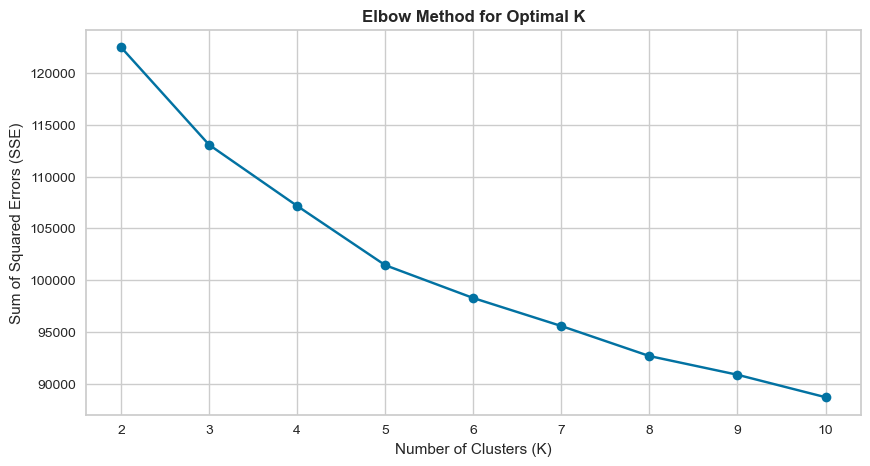

In [136]:
# @title
# Elbow Method
sse = []
k_values = range(2, 11)  # Test K from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_cluster)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K' ,fontweight='bold')
plt.show()

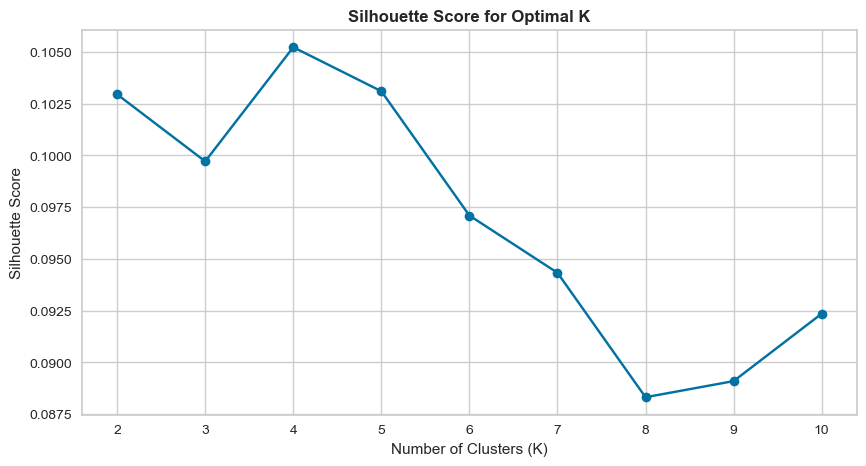

Optimal number of clusters (K) based on Silhouette Score: 4


In [137]:
# @title
# Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_cluster)
    silhouette_avg = silhouette_score(X_train_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K',fontweight='bold')
plt.show()

# Optimal K based on Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) based on Silhouette Score: {optimal_k}")

**Obeservations:**

From the two graphs:

**Elbow Method:** The SSE (Sum of Squared Errors) curve starts flattening significantly around K = 4 or 5, suggesting a good balance between reducing error and avoiding too many clusters.

**Silhouette Score:** The highest Silhouette Score is at K = 4, indicating the best cluster separation.

### **Cluster profiling**

In [140]:
# @title
# Creating Final Model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_train_cluster)

KMeans(n_clusters=4, random_state=0)

In [141]:

# adding kmeans cluster labels to the original dataframe
data_kmeans = X_train.copy()
data_kmeans["KM_segments"] = kmeans.labels_

In [142]:
# @title
data_train_cluster = pd.concat([data_kmeans,y_train],axis=1)

#Saving the file with clustering output
data_train_cluster.to_csv(os.path.join(parent_dir,'data','processed','data_train_cluster.csv'),index=False)
print("Saved the data with clustering to data/processed/data_train_cluster.csv")

Saved the data with clustering to data/processed/data_train_cluster.csv


In [143]:
# @title
data_kmeans.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,KM_segments
6135,0.0,1.0,8.0,DC,Male,2.0,4.0,Super,2.0,Divorced,10.0,0.0,22.0,2.0,2.0,154.75,Mobile,0
8088,5.0,1.0,9.0,COD,Male,3.0,3.0,Super,5.0,Married,9.0,0.0,15.0,0.0,2.0,146.87,Computer,3
1313,0.0,3.0,15.0,Wallet,Male,2.0,3.0,Regular Plus,5.0,Married,2.0,0.0,19.0,1.0,0.0,165.25,Computer,0
10426,1.0,1.0,38.0,DC,Female,4.0,4.0,Regular Plus,4.0,Married,3.0,1.0,21.0,7.0,9.0,148.22,Computer,1
10924,9.0,1.0,16.0,DC,Male,4.0,5.0,Regular Plus,1.0,Married,6.0,0.0,19.0,2.0,2.0,151.90,Mobile,2


In [144]:
# @title
#Generate Cluster Profile Report
num_columns = data_kmeans.select_dtypes(exclude=["object","category"]).columns.to_list()
cat_columns = data_kmeans.select_dtypes(include=["object","category"]).columns.to_list()
cluster_profile_num_summary = data_kmeans.groupby('KM_segments')[num_columns].mean()


# Step 2: Create a summary table
summary_table = cluster_profile_num_summary

# Step 3: Highlight maximum and minimum values in each row
def highlight_max_min(row):
    color_max = 'background-color: lightgreen'
    color_min = 'background-color: yellow'
    styles = []
    for val in row:
        if isinstance(val, (int, float)):
            if val == row.max():
                styles.append(color_max)
            elif val == row.min():
                styles.append(color_min)
            else:
                styles.append('')
        else:
            styles.append('')
    return styles

# Apply highlighting to the summary table
styled_table = summary_table.style.apply(highlight_max_min, axis=0)

# Display the styled table
print('Cluster Profiling for Numerical Columns:')
styled_table.format("{:.4f}")

Cluster Profiling for Numerical Columns:


,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,KM_segments
KM_segments,,,,,,,,,
0,3.3735,18.6524,3.7382,5.1148,16.2751,1.1967,3.1656,162.6165,0.0000
1,18.1449,15.1947,3.9445,8.5429,16.1103,4.3641,7.9315,298.5578,1.0000
2,13.3319,18.3952,3.6257,5.4052,16.3042,1.3143,4.2808,181.1863,2.0000
3,13.2401,17.8434,3.5768,7.5344,16.0707,1.4461,4.6563,182.8920,3.0000


In [145]:
# @title
cluster_profiles_cat_summary = data_kmeans.groupby('KM_segments').apply(lambda x: x.select_dtypes(include=['object','category']).apply(lambda col: col.value_counts())).unstack()

#Create a summary table
summary_table_cat = cluster_profiles_cat_summary.fillna(0)  # Replace NaN with 0 for better visualization

summary_table_cat = summary_table_cat.loc[:, (summary_table_cat != 0).any(axis=0)]

# Define the styling function
def highlight_max_min(row):
    color_max = 'background-color: lightgreen'
    color_min = 'background-color: yellow'
    styles = []
    for val in row:
        if isinstance(val, (int, float)):
            if val == row.max():
                styles.append(color_max)
            elif val == row.min():
                styles.append(color_min)
            else:
                styles.append('')
        else:
            styles.append('')
    return styles

summary_table_cat.columns = pd.MultiIndex.from_tuples(
    [(col[0], f"{col[1]:.1f}") if isinstance(col[1], float) else col for col in summary_table_cat.columns]
)

# Apply highlighting to the summary table

summary_table_cat = summary_table_cat.style.apply(highlight_max_min,axis=0)#.apply(highlight_min_row, axis=1)

print('Cluster Profiling for Categorical Columns:')
summary_table_cat.format("{:.4f}")



Cluster Profiling for Categorical Columns:


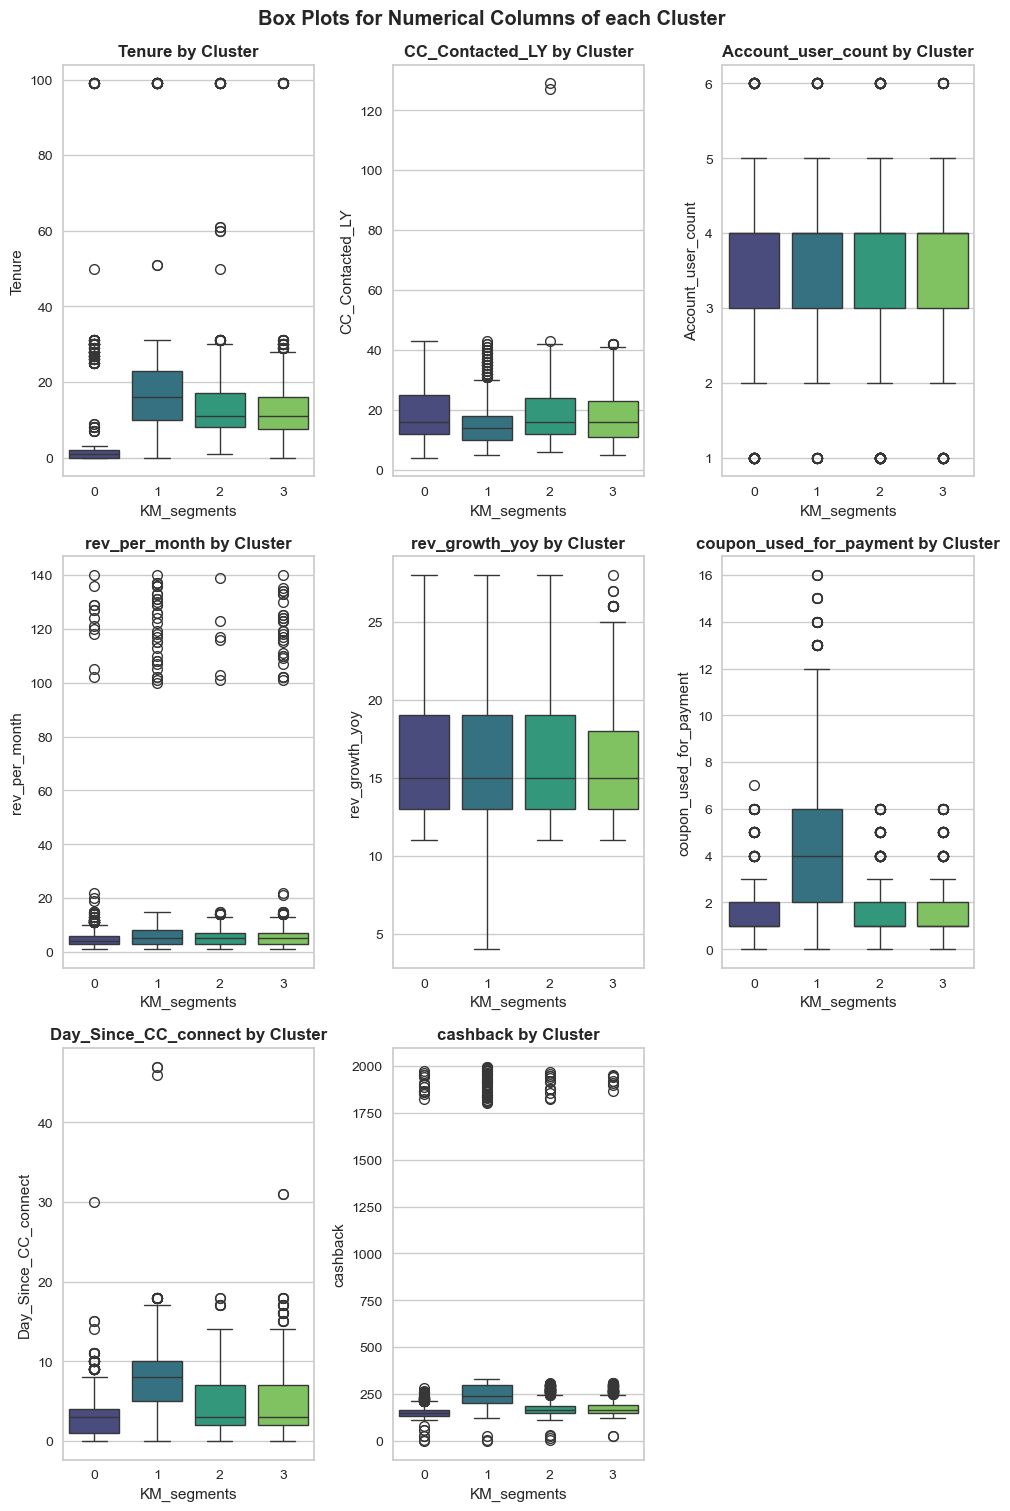

In [146]:
# @title
# Box plots for numeric features excluding KM_Segments

fig, axes = plt.subplots((len(num_columns)//3+1), 3, figsize=(10, 20))
fig.suptitle('Box Plots for Numerical Columns of each Cluster',fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(num_columns):
  if col=='KM_segments':
    axes[i].set_visible(False)
  else:
    sns.boxplot(x='KM_segments', y=col, data=data_kmeans, ax=axes[i],palette='viridis')
    axes[i].set_title(f'{col} by Cluster',fontweight='bold')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()



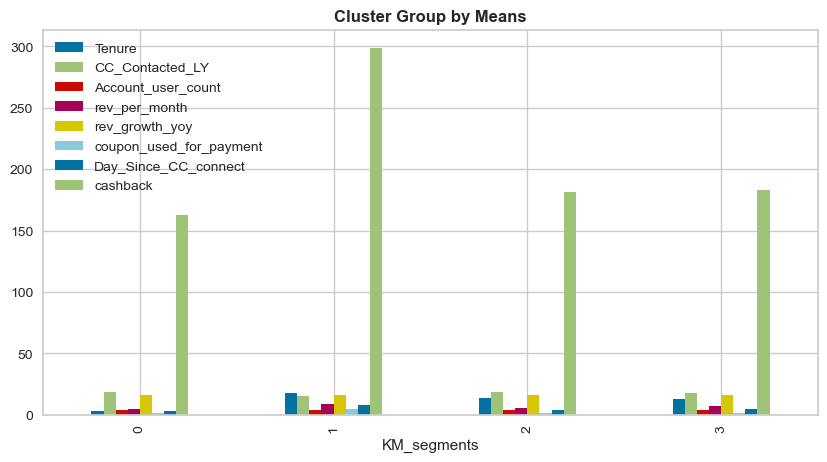

In [147]:
# @title
data_kmeans.groupby("KM_segments").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.show()

The values in cashback are significantly larger compared to those in other columns, so we're splitting the bar plot for better feature analysis.

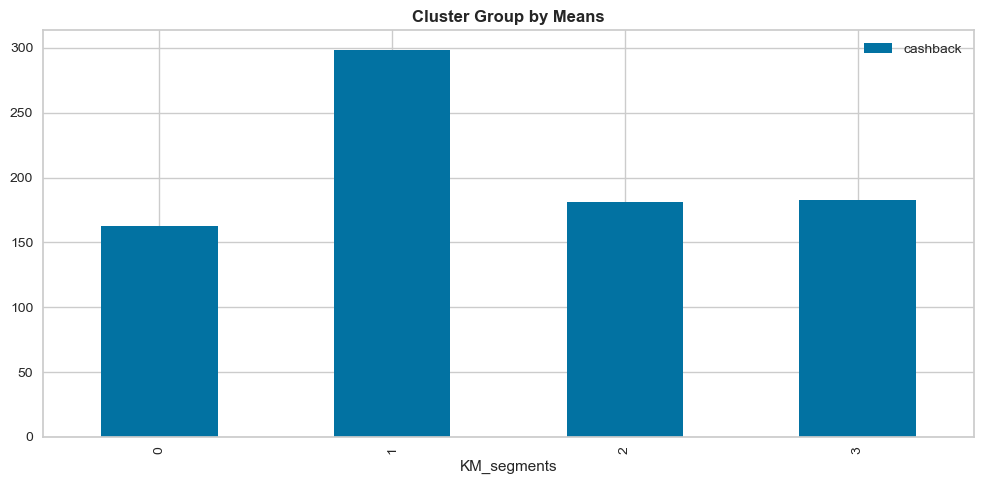

In [149]:
# @title
data_kmeans[['cashback','KM_segments']].groupby("KM_segments").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.tight_layout()
plt.show()

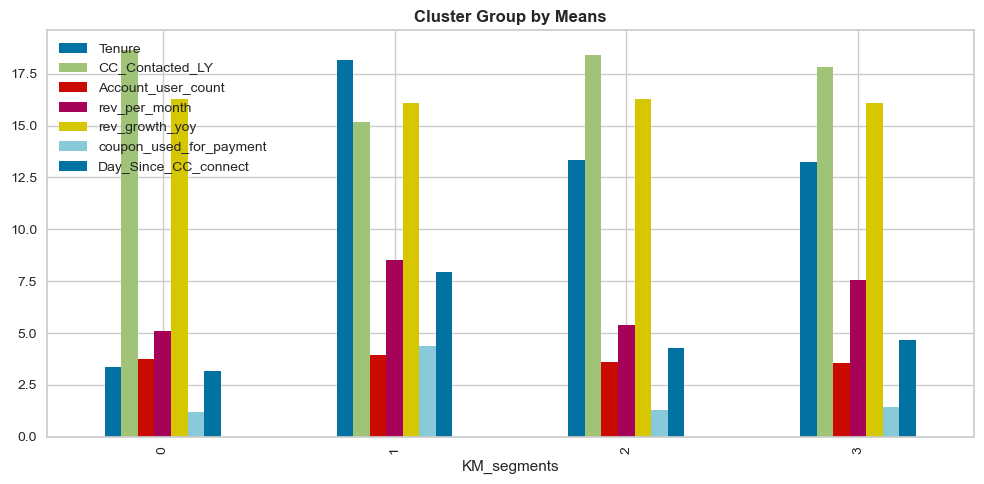

In [150]:
# @title
data_kmeans.drop('cashback',axis=1).groupby("KM_segments").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.tight_layout()
plt.show()

### **Cluster Summary**



Based on the provided cluster profiling for both numerical and categorical variables, the following insights can be drawn:

- **Cluster 0**
  - **Tenure**: Low (3.37 years)
  - **CC_Contacted_LY**: High (18.65 contacts)
  - **Account User Count**: Moderate (3.74 users)
  - **Revenue per Month**: Low (\$5.11K)
  - **Revenue Growth YoY**: Moderate (16.28%)
  - **Coupon Usage for Payment**: Low (1.20 coupons)
  - **Days Since Last CC Connect**: Low (3.17 days)
  - **Cashback**: Low ($162.62)
  - **Characteristics**: Newer customers with recent engagement, low revenue, and minimal coupon usage. Likely need proactive engagement to increase loyalty and spending.

- **Cluster 1**
  - **Tenure**: High (18.14 years)
  - **CC_Contacted_LY**: Moderate (15.19 contacts)
  - **Account User Count**: High (3.94 users)
  - **Revenue per Month**: High (\$8.54K)
  - **Revenue Growth YoY**: Moderate (16.11%)
  - **Coupon Usage for Payment**: High (4.36 coupons)
  - **Days Since Last CC Connect**: High (7.93 days)
  - **Cashback**: High ($298.56)
  - **Characteristics**: Long-term customers with high revenue and coupon usage but less frequent engagement. Valuable segment requiring retention strategies to maintain loyalty.

- **Cluster 2**
  - **Tenure**: Moderate (13.33 years)
  - **CC_Contacted_LY**: High (18.40 contacts)
  - **Account User Count**: Moderate (3.63 users)
  - **Revenue per Month**: Moderate ($5.41K)
  - **Revenue Growth YoY**: Moderate (16.30%)
  - **Coupon Usage for Payment**: Moderate (1.31 coupons)
  - **Days Since Last CC Connect**: Moderate (4.28 days)
  - **Cashback**: Moderate (\$181.19)
  - **Characteristics**: Mid-term customers with balanced engagement, moderate revenue, and coupon usage. Potential for growth through targeted offers.

- **Cluster 3**
  - **Tenure**: Moderate (13.24 years)
  - **CC_Contacted_LY**: High (17.84 contacts)
  - **Account User Count**: Moderate (3.58 users)
  - **Revenue per Month**: Moderate ($7.53K)
  - **Revenue Growth YoY**: Moderate (16.07%)
  - **Coupon Usage for Payment**: Moderate (1.45 coupons)
  - **Days Since Last CC Connect**: Moderate (4.66 days)
  - **Cashback**: Moderate (\$182.89)
  - **Characteristics**: Mid-term customers with slightly higher revenue and engagement compared to Cluster 2. Likely to respond well to loyalty programs and personalized offers.

- **Summary**
  - **Cluster 0**: Focus on increasing engagement and revenue through targeted campaigns and promotions.
  - **Cluster 1**: Strengthen retention strategies to maintain high revenue and loyalty.
  - **Cluster 2 & 3**: Enhance customer experience with personalized offers to drive growth and increase coupon usage.

## **Key Insights**

### **Key Insights from EDA:**

  - **Customer Care Interaction**  
    - **Day_Since_CC_connect**: Customers with a high number of days since their last interaction with Customer Care have a higher churn rate.  
    - **Number of CC Interactions**:  
      - Both very high and very low interaction counts correlate with increased churn.  
      - Possible reasons: dissatisfaction, unresolved issues, or disengagement.  

  - **Account Tenure**  
    - Customers with shorter tenure are more likely to churn.  
    - Long-tenured customers show higher retention rates.  

  - **Usage Patterns**  
    - **Low engagement customers** show a higher churn probability.  
    - Sudden changes in usage (increase or decrease) might be indicators of impending churn.  

  - **Billing & Payment Behavior**  
    - Late payments and payment failures correlate with churn.  
    - Customers on certain pricing plans may be more prone to leaving.  

  - **Customer Segments**  
    - Certain demographics or customer segments exhibit different churn tendencies.  
    - High-value customers tend to have lower churn rates.  




#### **Key Insights from Clustering**


- **Cluster 0 (Newer Customers)**:
  - **Characteristics**: Low tenure, recent engagement, low revenue, and minimal coupon usage.
  - **Insight**: These customers are new and have low spending but are actively engaged. They represent an opportunity to increase loyalty and revenue through targeted campaigns.

- **Cluster 1 (Long-Term Customers)**:
  - **Characteristics**: High tenure, high revenue, high coupon usage, but less frequent engagement.
  - **Insight**: These are loyal, high-value customers who generate significant revenue. However, their engagement is declining, which could lead to churn if not addressed.

- **Cluster 2 (Mid-Term Customers)**:
  - **Characteristics**: Moderate tenure, balanced engagement, moderate revenue, and coupon usage.
  - **Insight**: This segment has steady revenue and engagement but shows potential for growth through personalized offers and improved customer experience.

- **Cluster 3 (Mid-Term Customers with Higher Engagement)**:
  - **Characteristics**: Moderate tenure, higher engagement, moderate revenue, and coupon usage compared to Cluster 2.
  - **Insight**: These customers are more engaged than Cluster 2 and are likely to respond well to loyalty programs and personalized offers.